In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
%env JOBLIB_TEMP_FOLDER=/tmp

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

env: JOBLIB_TEMP_FOLDER=/tmp


# Functions

In [3]:
# cross-corpus function to count results in all the chosen algorithms 
def cross_corpus(models_list, names_list, x_train, y_train, x_test, y_test):
    """
    This function will count Recall and Precision metrics by class, their average scores and Accuracy score in all the chosen algorithms, where: 
    Args:
        models_list: all the models that are needed,  
        names_list: names of the models that will be printed later
        x_train: dataset that is used for training a model
        y_train: target values for train dataset (x_train) 
        x_test: dataset that is used for testing a model 
        y_test: target values for test dataset (x_test)
    """
    for model, name in zip(models_list, names_list):

        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # counting Presicion and Recall metrics for each class
        class0_pr = precision_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_pr = precision_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_pr = precision_score(y_test, y_pred, average = None, labels = [2]).tolist()
            
        class0_rec = recall_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_rec = recall_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_rec = recall_score(y_test, y_pred, average = None, labels = [2]).tolist()
        
        # counting F1 metrics for each class
        class0_f1 = f1_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_f1 = f1_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_f1 = f1_score(y_test, y_pred, average = None, labels = [2]).tolist()
        
        # counting weighted Presicion, Recall and F1 metrics for each class
        recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
        precision_weighted = precision_score(y_test, y_pred, average = 'weighted')
        f1_weighted = f1_score(y_test, y_pred, average = 'weighted')
        accuracy = accuracy_score(y_test, y_pred)
            
        print(f'{name}:')
        print('----------------------------------------------------')
        print('|Class               |F1-score |Recall   |Precision|')
        print('----------------------------------------------------') 
        print(f'|cough/кашель        |{"{:.3f}".format(class0_f1[0])}    |{"{:.3f}".format(class0_rec[0])}    |{"{:.3f}".format(class0_pr[0])}    |')
        print(f'|laugh/смех          |{"{:.3f}".format(class1_f1[0])}    |{"{:.3f}".format(class1_rec[0])}    |{"{:.3f}".format(class1_pr[0])}    |')
        print(f'|sneeze/чихание      |{"{:.3f}".format(class2_f1[0])}    |{"{:.3f}".format(class2_rec[0])}    |{"{:.3f}".format(class2_pr[0])}    |')
        print('----------------------------------------------------')
        print(f'Weighted average Precision : {"{:.3f}".format(precision_weighted)}                 |')
        print('----------------------------------------------------')
        print(f'Weighted average Recall : {"{:.3f}".format(recall_weighted)}                    |')
        print('----------------------------------------------------')
        print(f'Weighted average F1 : {"{:.3f}".format(f1_weighted)}                        |')
        print('----------------------------------------------------')
        print(f'Accuracy : {"{:.3f}".format(accuracy)}                                   |')
        print('----------------------------------------------------')
        print()
        
        #Confusion matrix
        titles_options = [('Confusion matrix:')]
        target_names=[f"cough\nкашель", f"laugh\nсмех", f"sneeze\nчихание"]

        conf = confusion_matrix(y_test, y_pred)
        for title in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=target_names,cmap=plt.cm.Blues, colorbar=False, normalize=None)
            disp.ax_.set_title(title)
            print(title)
            print(disp.confusion_matrix)

        plt.show()

# ML Algorithms and Neural Network

In [6]:
# The list of the used models 

models = [SVC(kernel='poly'), 
             SVC(kernel='rbf'), 
             SVC(kernel='sigmoid'), 
             LDA(), 
             KNeighborsClassifier(n_neighbors=7), 
             LogisticRegression(), 
             DecisionTreeClassifier(),
             MLPClassifier(hidden_layer_sizes=(256, 256, 256), validation_fraction=0.5, verbose=False, random_state=1),  # the one was good for Nonspeech7k dataset
             MLPClassifier(hidden_layer_sizes=(256), validation_fraction=0.5, verbose=False, random_state=1)]            # the one was good for Vocal Sound dataset

names = ['SVM_Poly', 'SVM_RBF', 'SVM_Sigmoid', 'LDA', 'KNN', 'Logistis Regression', 'Decision Tree', "Neural Neutwork for Nonspeech7k", 'Neural Network for Vocal Sound']

# DATA FOR CROSS-CORPUS

In [7]:
# GEMAPS FEATURES
nonspeech_gemaps = pd.read_csv('/Nonspeech_gemaps_common_crosscorp.csv')
nonspeech_gemaps = nonspeech_gemaps.to_numpy()
nonspeech_targets_gemaps = np.loadtxt('Nonspeech_target_values_gemaps_crosscorp.csv')

vocalsound_gemaps = pd.read_csv('vocalsound_gemaps_crosscorp.csv')
vocalsound_gemaps = vocalsound_gemaps.to_numpy()
vocalsound_targets_gemaps = np.loadtxt('vocalsound_target_values_gemaps_crosscorp.csv')

In [8]:
#eGEMAPS FEATURES
nonspeech_egemaps = pd.read_csv('Nonspeech_egemaps_common_crosscorp.csv')
nonspeech_egemaps = nonspeech_egemaps.to_numpy()
nonspeech_egemaps_targets = np.loadtxt('Nonspeech_target_values_egemaps_crosscorp.csv')

vocalsound_egemaps = pd.read_csv('vocalsound_egemaps_crosscorp.csv')
vocalsound_egemaps = vocalsound_egemaps.to_numpy()
vocalsound_egemaps_targets = np.loadtxt('vocalsound_target_values_egemaps_crosscorp.csv')

In [9]:
# INTERSPEECH 2009 FEATURES
nonspeech_IS09 = pd.read_csv('Nonspeech_IS09_common_crosscorp.csv')
nonspeech_IS09 = nonspeech_IS09.to_numpy()
nonspeech_IS09_targets = np.loadtxt('Nonspeech_target_values_IS09_crosscorp.csv')

vocalsound_IS09 = pd.read_csv('vocalsound_IS09_crosscorp.csv')
vocalsound_IS09 = vocalsound_IS09.to_numpy()
vocalsound_IS09_targets = np.loadtxt('vocalsound_target_values_IS09_crosscorp.csv')

In [10]:
# INTERSPEECH 2010 FEATURES
nonspeech_IS10 = pd.read_csv('Nonspeech_IS10_common_crosscorp.csv')
nonspeech_IS10 = nonspeech_IS10.to_numpy()
nonspeech_IS10_targets = np.loadtxt('Nonspeech_target_values_IS10_crosscorp.csv')

vocalsound_IS10 = pd.read_csv('vocalsound_IS10_crosscorp.csv')
vocalsound_IS10 = vocalsound_IS10.to_numpy()
vocalsound_IS10_targets = np.loadtxt('vocalsound_target_values_IS10_crosscorp.csv')

In [11]:
# INTERSPEECH 2013 FEATURES
nonspeech_IS13 = pd.read_csv('Nonspeech_IS13_common_crosscorp.csv')
nonspeech_IS13 = nonspeech_IS13.to_numpy()
nonspeech_IS13_targets = np.loadtxt('Nonspeech_target_values_IS13_crosscorp.csv')

vocalsound_IS13 = pd.read_csv('vocalsound_IS13_crosscorp.csv')
vocalsound_IS13 = vocalsound_IS13.to_numpy()
vocalsound_IS13_targets = np.loadtxt('vocalsound_target_values_IS13_crosscorp.csv')

# GEMAPS

In [14]:
# Nonspeech7k
scaler.fit(nonspeech_gemaps)
nonspeech_gemaps_dataset_scaler = scaler.transform(nonspeech_gemaps)

# Vocal Sound
scaler.fit(vocalsound_gemaps)
vocalsound_gemaps_dataset_scaler = scaler.transform(vocalsound_gemaps)

In [13]:
pca = PCA(.95) 
pca.fit(nonspeech_gemaps_dataset_scaler)
pca.fit(vocalsound_gemaps_dataset_scaler)

nonspeech_gemaps_dataset_pca = pca.transform(nonspeech_gemaps_dataset_scaler)
vocalsound_gemaps_dataset_pca = pca.transform(vocalsound_gemaps_dataset_scaler)

## TEST WITH GEMAPS DATA

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.194    |0.139    |0.322    |
|laugh/смех          |0.567    |0.981    |0.398    |
|sneeze/чихание      |0.128    |0.070    |0.748    |
----------------------------------------------------
Weighted average Precision : 0.487                 |
----------------------------------------------------
Weighted average Recall : 0.398                    |
----------------------------------------------------
Weighted average F1 : 0.297                        |
----------------------------------------------------
Accuracy : 0.398                                   |
----------------------------------------------------

Confusion matrix:
[[ 468 2845   66]
 [  52 3295   12]
 [ 933 2129  231]]


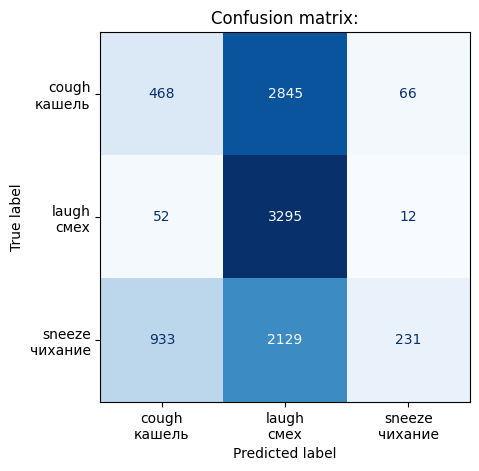

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.495    |0.526    |0.467    |
|laugh/смех          |0.663    |0.904    |0.524    |
|sneeze/чихание      |0.175    |0.099    |0.763    |
----------------------------------------------------
Weighted average Precision : 0.583                 |
----------------------------------------------------
Weighted average Recall : 0.513                    |
----------------------------------------------------
Weighted average F1 : 0.446                        |
----------------------------------------------------
Accuracy : 0.513                                   |
----------------------------------------------------

Confusion matrix:
[[1779 1516   84]
 [ 306 3036   17]
 [1726 1241  326]]


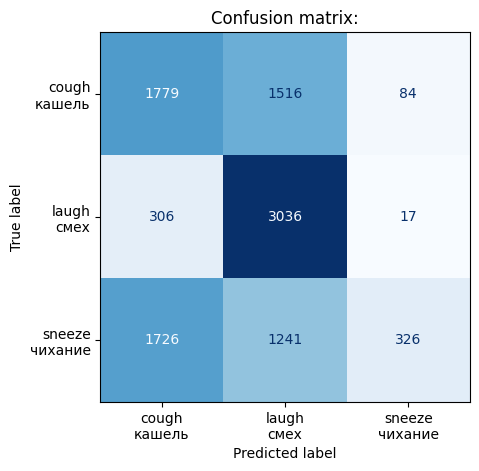

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.415    |0.430    |0.401    |
|laugh/смех          |0.623    |0.837    |0.496    |
|sneeze/чихание      |0.253    |0.155    |0.685    |
----------------------------------------------------
Weighted average Precision : 0.526                 |
----------------------------------------------------
Weighted average Recall : 0.476                    |
----------------------------------------------------
Weighted average F1 : 0.431                        |
----------------------------------------------------
Accuracy : 0.476                                   |
----------------------------------------------------

Confusion matrix:
[[1454 1777  148]
 [ 462 2811   86]
 [1707 1076  510]]


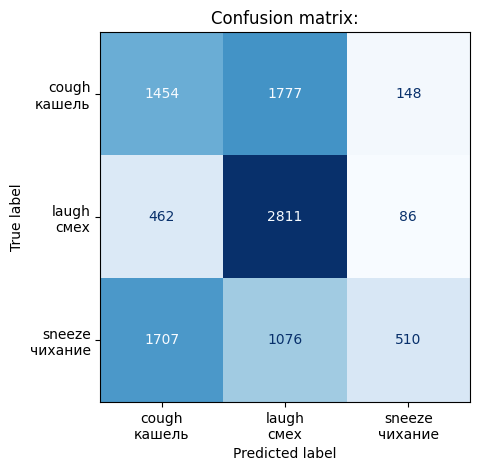

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.442    |0.438    |0.445    |
|laugh/смех          |0.679    |0.934    |0.534    |
|sneeze/чихание      |0.309    |0.193    |0.765    |
----------------------------------------------------
Weighted average Precision : 0.580                 |
----------------------------------------------------
Weighted average Recall : 0.524                    |
----------------------------------------------------
Weighted average F1 : 0.478                        |
----------------------------------------------------
Accuracy : 0.524                                   |
----------------------------------------------------

Confusion matrix:
[[1480 1740  159]
 [ 186 3136   37]
 [1658  998  637]]


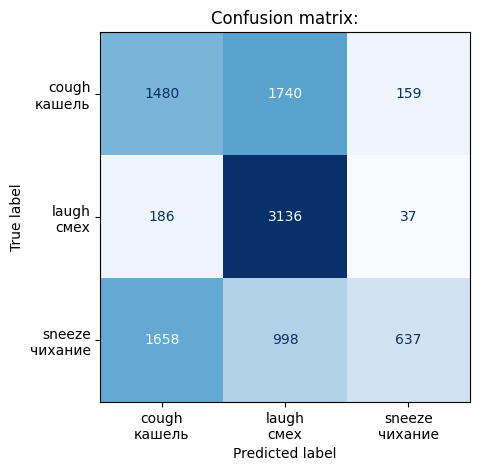

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.414    |0.406    |0.421    |
|laugh/смех          |0.613    |0.894    |0.466    |
|sneeze/чихание      |0.115    |0.063    |0.632    |
----------------------------------------------------
Weighted average Precision : 0.506                 |
----------------------------------------------------
Weighted average Recall : 0.457                    |
----------------------------------------------------
Weighted average F1 : 0.382                        |
----------------------------------------------------
Accuracy : 0.457                                   |
----------------------------------------------------

Confusion matrix:
[[1373 1914   92]
 [ 326 3004   29]
 [1561 1524  208]]


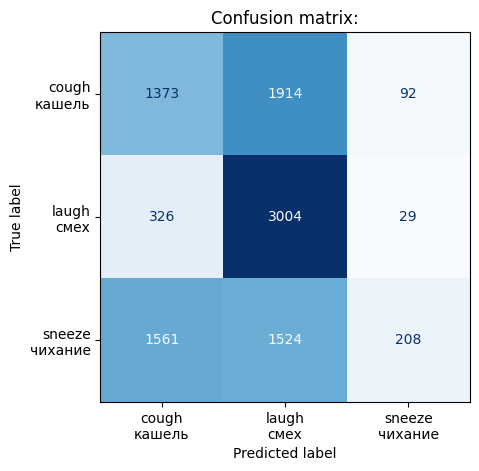

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.453    |0.453    |0.452    |
|laugh/смех          |0.674    |0.912    |0.534    |
|sneeze/чихание      |0.334    |0.213    |0.773    |
----------------------------------------------------
Weighted average Precision : 0.585                 |
----------------------------------------------------
Weighted average Recall : 0.528                    |
----------------------------------------------------
Weighted average F1 : 0.488                        |
----------------------------------------------------
Accuracy : 0.528                                   |
----------------------------------------------------

Confusion matrix:
[[1532 1678  169]
 [ 260 3062   37]
 [1599  992  702]]


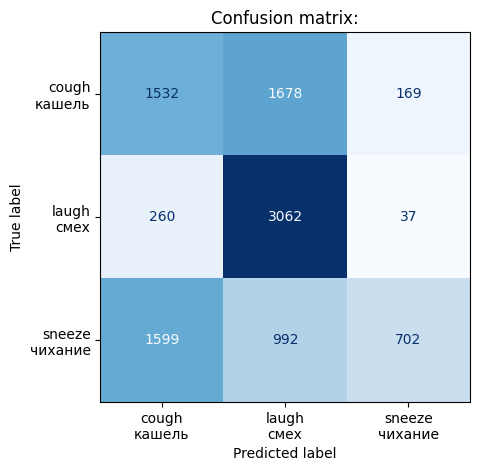

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.389    |0.391    |0.388    |
|laugh/смех          |0.539    |0.695    |0.440    |
|sneeze/чихание      |0.251    |0.176    |0.442    |
----------------------------------------------------
Weighted average Precision : 0.423                 |
----------------------------------------------------
Weighted average Recall : 0.422                    |
----------------------------------------------------
Weighted average F1 : 0.394                        |
----------------------------------------------------
Accuracy : 0.422                                   |
----------------------------------------------------

Confusion matrix:
[[1322 1586  471]
 [ 764 2335  260]
 [1325 1390  578]]


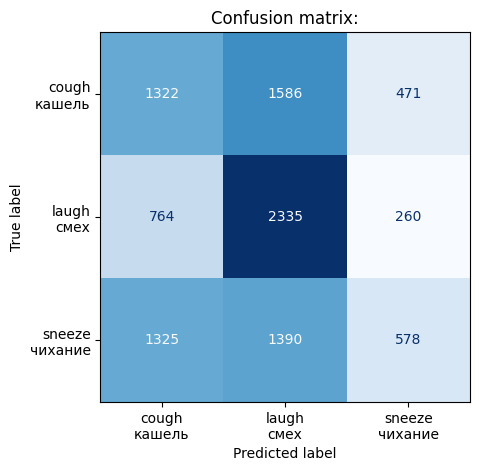

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.508    |0.536    |0.484    |
|laugh/смех          |0.660    |0.852    |0.538    |
|sneeze/чихание      |0.321    |0.207    |0.706    |
----------------------------------------------------
Weighted average Precision : 0.575                 |
----------------------------------------------------
Weighted average Recall : 0.534                    |
----------------------------------------------------
Weighted average F1 : 0.497                        |
----------------------------------------------------
Accuracy : 0.534                                   |
----------------------------------------------------

Confusion matrix:
[[1810 1350  219]
 [ 430 2863   66]
 [1503 1107  683]]


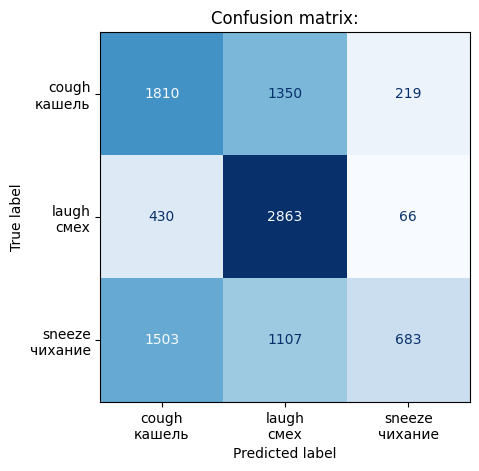

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.527    |0.565    |0.494    |
|laugh/смех          |0.662    |0.851    |0.542    |
|sneeze/чихание      |0.297    |0.188    |0.700    |
----------------------------------------------------
Weighted average Precision : 0.577                 |
----------------------------------------------------
Weighted average Recall : 0.537                    |
----------------------------------------------------
Weighted average F1 : 0.497                        |
----------------------------------------------------
Accuracy : 0.537                                   |
----------------------------------------------------

Confusion matrix:
[[1909 1273  197]
 [ 430 2860   69]
 [1529 1144  620]]


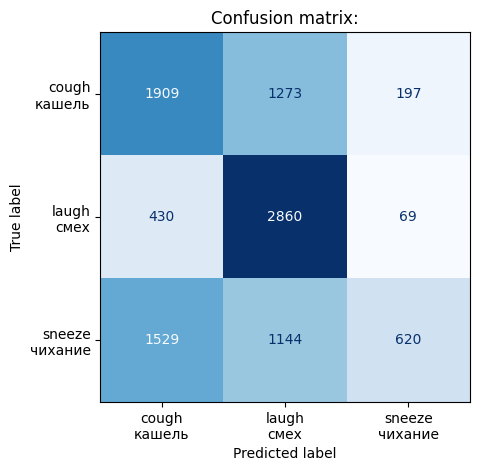

In [18]:
# nonspeech - train, vocalsound-test
cross_corpus(models, names, nonspeech_gemaps_dataset_pca, nonspeech_targets_gemaps, vocalsound_gemaps_dataset_pca, vocalsound_targets_gemaps)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.503    |0.685    |0.397    |
|laugh/смех          |0.579    |0.430    |0.882    |
|sneeze/чихание      |0.308    |0.391    |0.254    |
----------------------------------------------------
Weighted average Precision : 0.656                 |
----------------------------------------------------
Weighted average Recall : 0.506                    |
----------------------------------------------------
Weighted average F1 : 0.523                        |
----------------------------------------------------
Accuracy : 0.506                                   |
----------------------------------------------------

Confusion matrix:
[[481  59 162]
 [582 548 143]
 [148  14 104]]


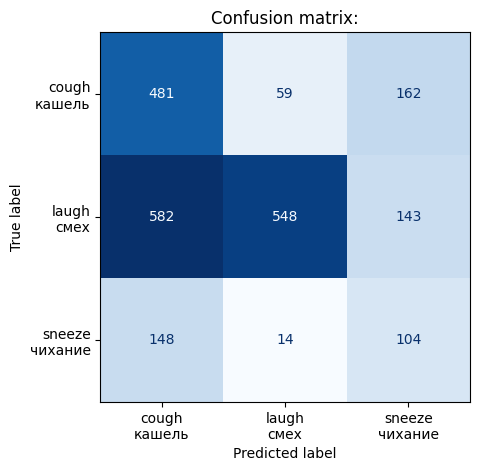

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.484    |0.494    |0.474    |
|laugh/смех          |0.653    |0.521    |0.876    |
|sneeze/чихание      |0.385    |0.737    |0.261    |
----------------------------------------------------
Weighted average Precision : 0.677                 |
----------------------------------------------------
Weighted average Recall : 0.538                    |
----------------------------------------------------
Weighted average F1 : 0.568                        |
----------------------------------------------------
Accuracy : 0.538                                   |
----------------------------------------------------

Confusion matrix:
[[347  81 274]
 [328 663 282]
 [ 57  13 196]]


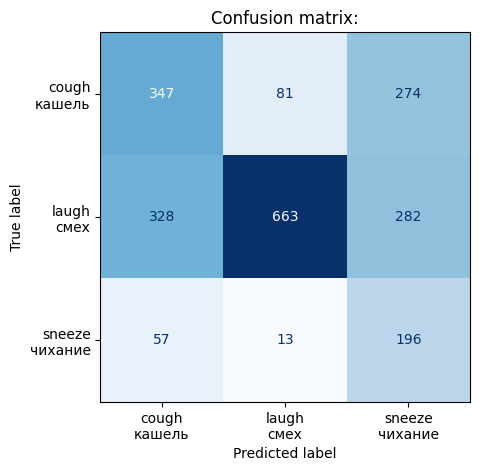

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.446    |0.449    |0.443    |
|laugh/смех          |0.551    |0.417    |0.809    |
|sneeze/чихание      |0.307    |0.658    |0.200    |
----------------------------------------------------
Weighted average Precision : 0.622                 |
----------------------------------------------------
Weighted average Recall : 0.456                    |
----------------------------------------------------
Weighted average F1 : 0.489                        |
----------------------------------------------------
Accuracy : 0.456                                   |
----------------------------------------------------

Confusion matrix:
[[315  95 292]
 [335 531 407]
 [ 61  30 175]]


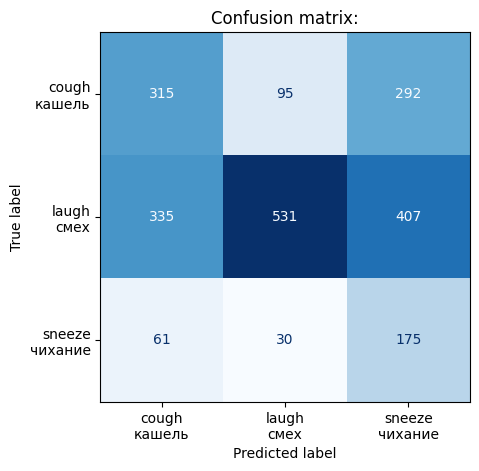

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.491    |0.536    |0.454    |
|laugh/смех          |0.641    |0.517    |0.845    |
|sneeze/чихание      |0.356    |0.602    |0.253    |
----------------------------------------------------
Weighted average Precision : 0.652                 |
----------------------------------------------------
Weighted average Recall : 0.533                    |
----------------------------------------------------
Weighted average F1 : 0.560                        |
----------------------------------------------------
Accuracy : 0.533                                   |
----------------------------------------------------

Confusion matrix:
[[376 102 224]
 [366 658 249]
 [ 87  19 160]]


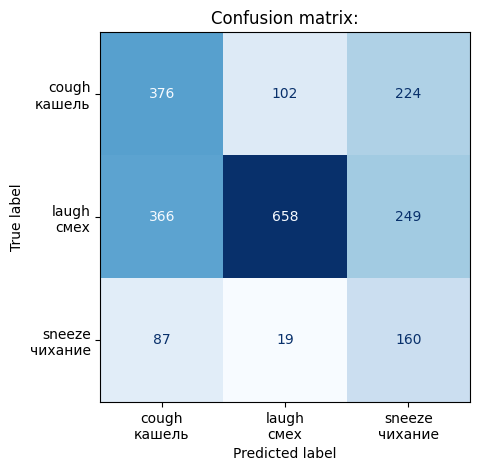

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.490    |0.603    |0.413    |
|laugh/смех          |0.620    |0.493    |0.838    |
|sneeze/чихание      |0.294    |0.406    |0.230    |
----------------------------------------------------
Weighted average Precision : 0.633                 |
----------------------------------------------------
Weighted average Recall : 0.517                    |
----------------------------------------------------
Weighted average F1 : 0.541                        |
----------------------------------------------------
Accuracy : 0.517                                   |
----------------------------------------------------

Confusion matrix:
[[423  90 189]
 [474 627 172]
 [127  31 108]]


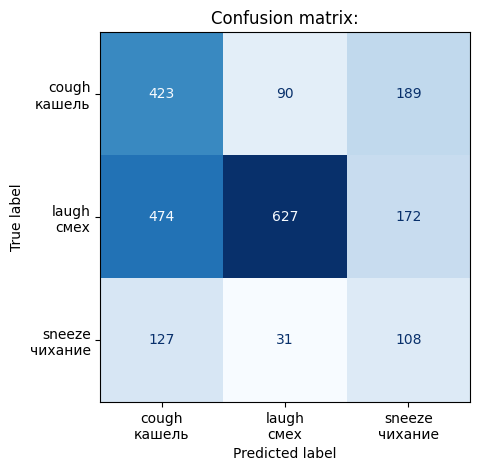

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.503    |0.544    |0.467    |
|laugh/смех          |0.667    |0.546    |0.857    |
|sneeze/чихание      |0.360    |0.594    |0.258    |
----------------------------------------------------
Weighted average Precision : 0.664                 |
----------------------------------------------------
Weighted average Recall : 0.551                    |
----------------------------------------------------
Weighted average F1 : 0.579                        |
----------------------------------------------------
Accuracy : 0.551                                   |
----------------------------------------------------

Confusion matrix:
[[382  99 221]
 [345 695 233]
 [ 91  17 158]]


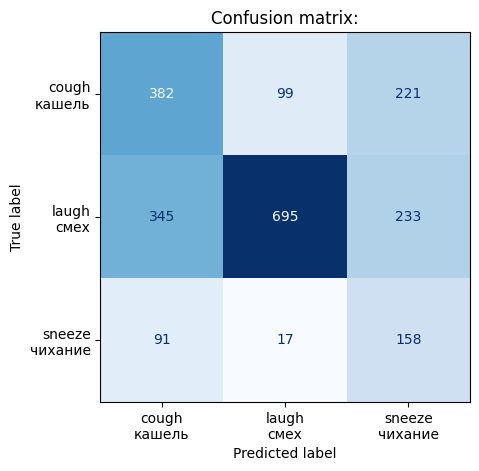

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.398    |0.429    |0.371    |
|laugh/смех          |0.564    |0.450    |0.754    |
|sneeze/чихание      |0.267    |0.470    |0.187    |
----------------------------------------------------
Weighted average Precision : 0.567                 |
----------------------------------------------------
Weighted average Recall : 0.446                    |
----------------------------------------------------
Weighted average F1 : 0.477                        |
----------------------------------------------------
Accuracy : 0.446                                   |
----------------------------------------------------

Confusion matrix:
[[301 149 252]
 [408 573 292]
 [103  38 125]]


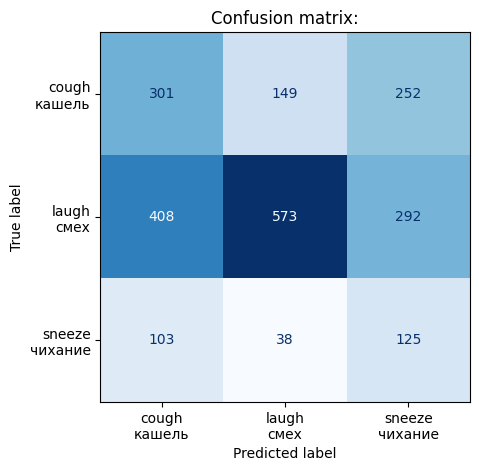

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.450    |0.469    |0.433    |
|laugh/смех          |0.627    |0.502    |0.834    |
|sneeze/чихание      |0.379    |0.699    |0.260    |
----------------------------------------------------
Weighted average Precision : 0.640                 |
----------------------------------------------------
Weighted average Recall : 0.515                    |
----------------------------------------------------
Weighted average F1 : 0.542                        |
----------------------------------------------------
Accuracy : 0.515                                   |
----------------------------------------------------

Confusion matrix:
[[329 111 262]
 [367 639 267]
 [ 64  16 186]]


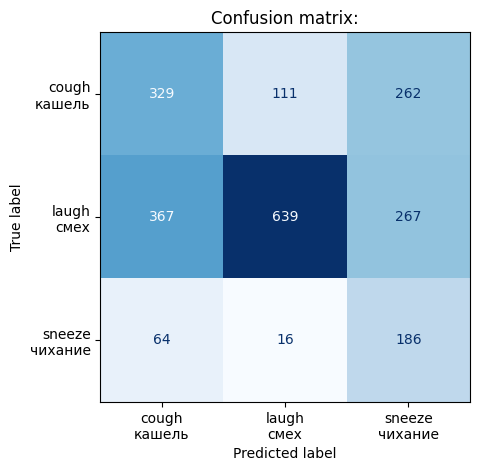

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.457    |0.484    |0.433    |
|laugh/смех          |0.611    |0.474    |0.860    |
|sneeze/чихание      |0.369    |0.707    |0.249    |
----------------------------------------------------
Weighted average Precision : 0.654                 |
----------------------------------------------------
Weighted average Recall : 0.505                    |
----------------------------------------------------
Weighted average F1 : 0.534                        |
----------------------------------------------------
Accuracy : 0.505                                   |
----------------------------------------------------

Confusion matrix:
[[340  84 278]
 [382 603 288]
 [ 64  14 188]]


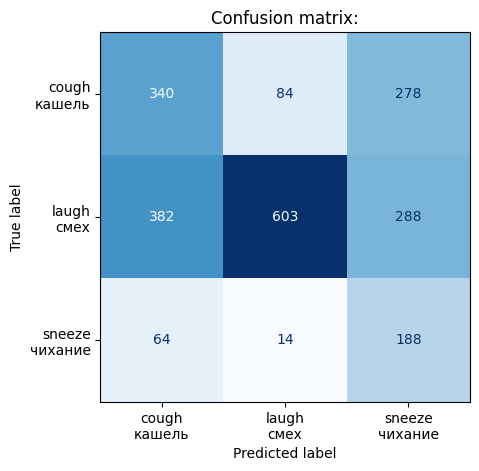

In [19]:
# vocalsound-train, nonspeech-test
cross_corpus(models, names, vocalsound_gemaps_dataset_pca, vocalsound_targets_gemaps, nonspeech_gemaps_dataset_pca, nonspeech_targets_gemaps)

# EGEMAPS

In [15]:
# Nonspeech7k
scaler.fit(nonspeech_egemaps)
nonspeech_egemaps_dataset_scaler = scaler.transform(nonspeech_egemaps)

# Vocal Sound
scaler.fit(vocalsound_egemaps)
vocalsound_egemaps_dataset_scaler = scaler.transform(vocalsound_egemaps)

In [16]:
pca = PCA(.95) 
pca.fit(nonspeech_egemaps_dataset_scaler)
pca.fit(vocalsound_egemaps_dataset_scaler)

nonspeech_egemaps_dataset_pca = pca.transform(nonspeech_egemaps_dataset_scaler)
vocalsound_egemaps_dataset_pca = pca.transform(vocalsound_egemaps_dataset_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.182    |0.126    |0.328    |
|laugh/смех          |0.559    |0.982    |0.390    |
|sneeze/чихание      |0.127    |0.069    |0.792    |
----------------------------------------------------
Weighted average Precision : 0.501                 |
----------------------------------------------------
Weighted average Recall : 0.394                    |
----------------------------------------------------
Weighted average F1 : 0.290                        |
----------------------------------------------------
Accuracy : 0.394                                   |
----------------------------------------------------

Confusion matrix:
[[ 425 2905   49]
 [  50 3298   11]
 [ 819 2246  228]]


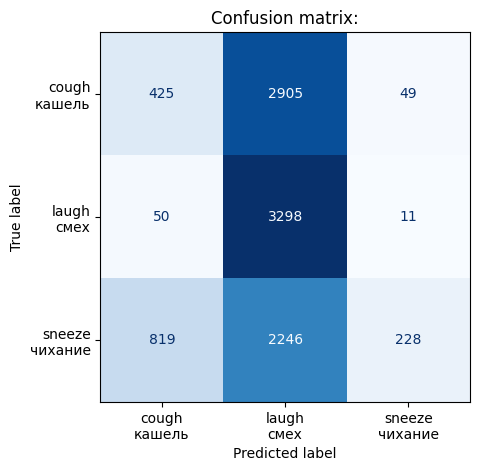

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.536    |0.572    |0.503    |
|laugh/смех          |0.687    |0.911    |0.551    |
|sneeze/чихание      |0.255    |0.152    |0.783    |
----------------------------------------------------
Weighted average Precision : 0.611                 |
----------------------------------------------------
Weighted average Recall : 0.548                    |
----------------------------------------------------
Weighted average F1 : 0.494                        |
----------------------------------------------------
Accuracy : 0.548                                   |
----------------------------------------------------

Confusion matrix:
[[1933 1333  113]
 [ 272 3061   26]
 [1635 1157  501]]


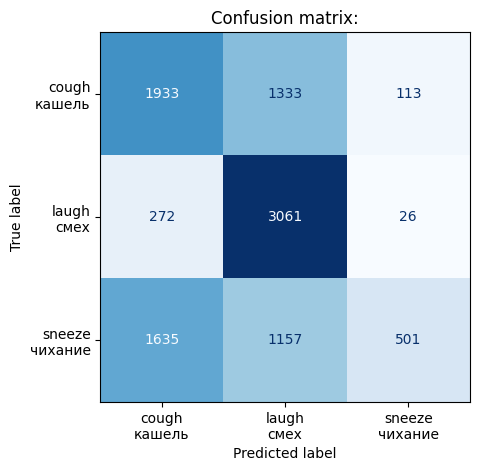

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.419    |0.423    |0.414    |
|laugh/смех          |0.639    |0.853    |0.511    |
|sneeze/чихание      |0.315    |0.203    |0.696    |
----------------------------------------------------
Weighted average Precision : 0.539                 |
----------------------------------------------------
Weighted average Recall : 0.495                    |
----------------------------------------------------
Weighted average F1 : 0.458                        |
----------------------------------------------------
Accuracy : 0.495                                   |
----------------------------------------------------

Confusion matrix:
[[1431 1741  207]
 [ 408 2866   85]
 [1618 1006  669]]


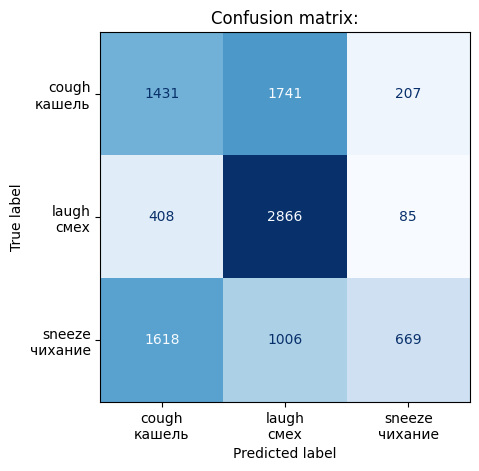

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.492    |0.487    |0.497    |
|laugh/смех          |0.698    |0.929    |0.558    |
|sneeze/чихание      |0.409    |0.275    |0.802    |
----------------------------------------------------
Weighted average Precision : 0.618                 |
----------------------------------------------------
Weighted average Recall : 0.565                    |
----------------------------------------------------
Weighted average F1 : 0.534                        |
----------------------------------------------------
Accuracy : 0.565                                   |
----------------------------------------------------

Confusion matrix:
[[1646 1548  185]
 [ 199 3122   38]
 [1467  922  904]]


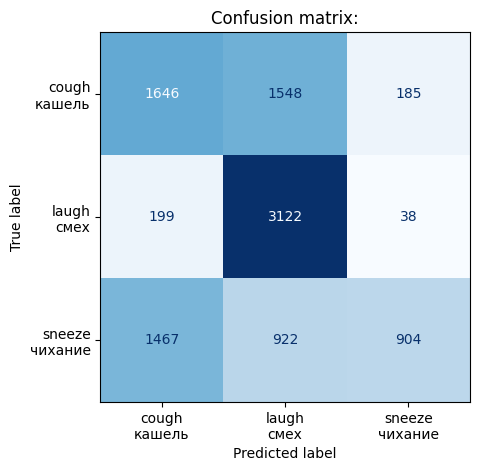

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.407    |0.387    |0.428    |
|laugh/смех          |0.598    |0.888    |0.451    |
|sneeze/чихание      |0.143    |0.079    |0.719    |
----------------------------------------------------
Weighted average Precision : 0.531                 |
----------------------------------------------------
Weighted average Recall : 0.454                    |
----------------------------------------------------
Weighted average F1 : 0.384                        |
----------------------------------------------------
Accuracy : 0.454                                   |
----------------------------------------------------

Confusion matrix:
[[1308 1988   83]
 [ 356 2984   19]
 [1390 1642  261]]


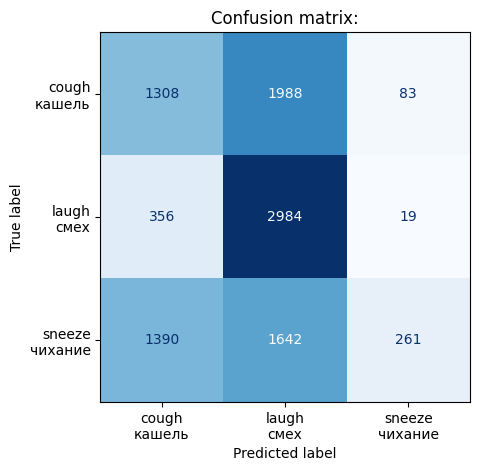

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.507    |0.510    |0.505    |
|laugh/смех          |0.701    |0.910    |0.570    |
|sneeze/чихание      |0.433    |0.299    |0.784    |
----------------------------------------------------
Weighted average Precision : 0.618                 |
----------------------------------------------------
Weighted average Recall : 0.575                    |
----------------------------------------------------
Weighted average F1 : 0.548                        |
----------------------------------------------------
Accuracy : 0.575                                   |
----------------------------------------------------

Confusion matrix:
[[1722 1451  206]
 [ 238 3056   65]
 [1449  859  985]]


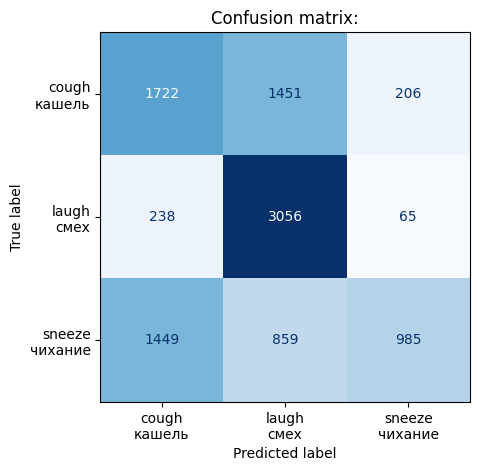

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.385    |0.378    |0.392    |
|laugh/смех          |0.488    |0.646    |0.392    |
|sneeze/чихание      |0.221    |0.152    |0.406    |
----------------------------------------------------
Weighted average Precision : 0.397                 |
----------------------------------------------------
Weighted average Recall : 0.394                    |
----------------------------------------------------
Weighted average F1 : 0.366                        |
----------------------------------------------------
Accuracy : 0.394                                   |
----------------------------------------------------

Confusion matrix:
[[1278 1697  404]
 [ 861 2170  328]
 [1124 1668  501]]


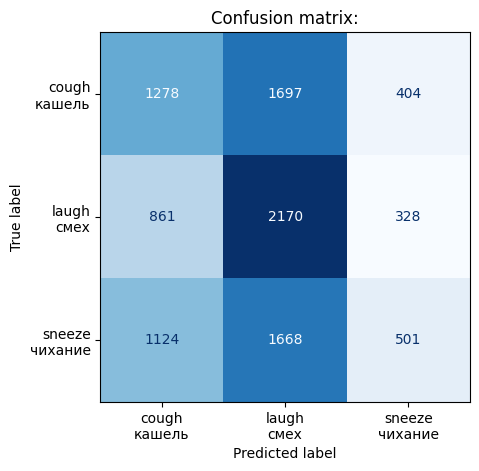

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.529    |0.540    |0.518    |
|laugh/смех          |0.672    |0.846    |0.557    |
|sneeze/чихание      |0.418    |0.298    |0.701    |
----------------------------------------------------
Weighted average Precision : 0.591                 |
----------------------------------------------------
Weighted average Recall : 0.563                    |
----------------------------------------------------
Weighted average F1 : 0.540                        |
----------------------------------------------------
Accuracy : 0.563                                   |
----------------------------------------------------

Confusion matrix:
[[1826 1248  305]
 [ 403 2842  114]
 [1298 1014  981]]


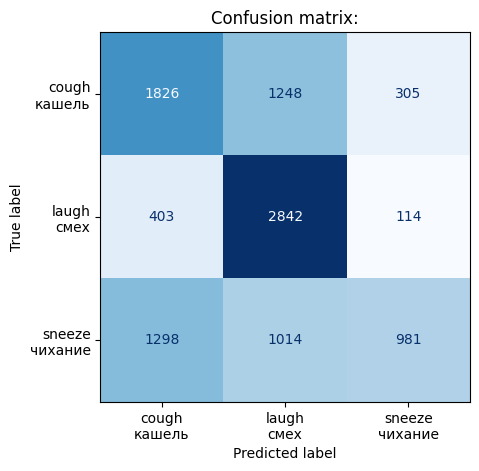

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.538    |0.553    |0.524    |
|laugh/смех          |0.652    |0.848    |0.530    |
|sneeze/чихание      |0.348    |0.231    |0.703    |
----------------------------------------------------
Weighted average Precision : 0.585                 |
----------------------------------------------------
Weighted average Recall : 0.546                    |
----------------------------------------------------
Weighted average F1 : 0.514                        |
----------------------------------------------------
Accuracy : 0.546                                   |
----------------------------------------------------

Confusion matrix:
[[1870 1267  242]
 [ 431 2848   80]
 [1270 1261  762]]


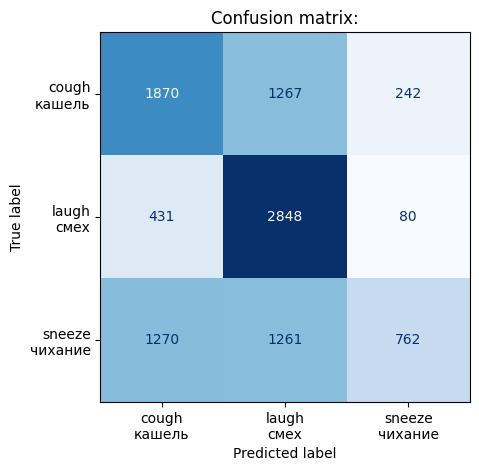

In [17]:
# nonspeech - train, vocalsound-test
cross_corpus(models, names, nonspeech_egemaps_dataset_pca, nonspeech_egemaps_targets, vocalsound_egemaps_dataset_pca, vocalsound_egemaps_targets)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.512    |0.722    |0.396    |
|laugh/смех          |0.543    |0.390    |0.894    |
|sneeze/чихание      |0.324    |0.410    |0.268    |
----------------------------------------------------
Weighted average Precision : 0.664                 |
----------------------------------------------------
Weighted average Recall : 0.496                    |
----------------------------------------------------
Weighted average F1 : 0.507                        |
----------------------------------------------------
Accuracy : 0.496                                   |
----------------------------------------------------

Confusion matrix:
[[507  46 149]
 [628 496 149]
 [144  13 109]]


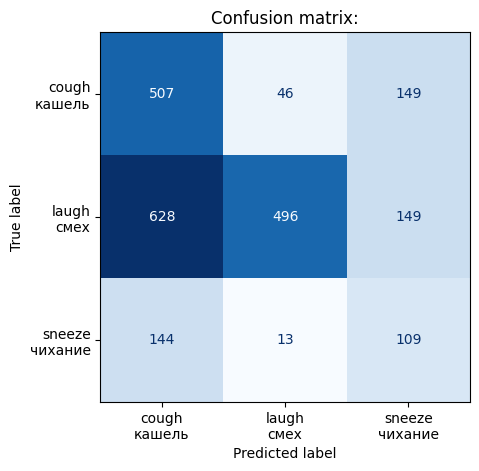

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.515    |0.554    |0.481    |
|laugh/смех          |0.644    |0.503    |0.894    |
|sneeze/чихание      |0.378    |0.699    |0.259    |
----------------------------------------------------
Weighted average Precision : 0.689                 |
----------------------------------------------------
Weighted average Recall : 0.542                    |
----------------------------------------------------
Weighted average F1 : 0.572                        |
----------------------------------------------------
Accuracy : 0.542                                   |
----------------------------------------------------

Confusion matrix:
[[389  64 249]
 [351 640 282]
 [ 68  12 186]]


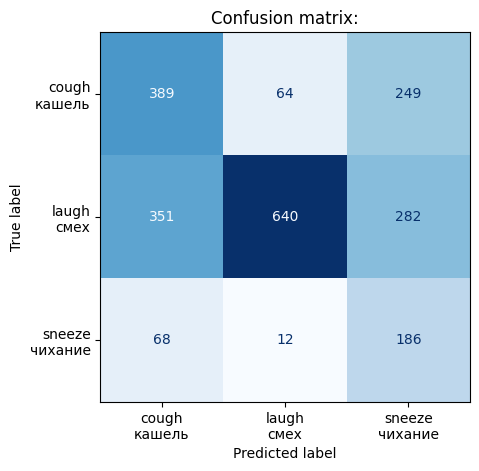

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.456    |0.460    |0.451    |
|laugh/смех          |0.667    |0.575    |0.794    |
|sneeze/чихание      |0.336    |0.549    |0.242    |
----------------------------------------------------
Weighted average Precision : 0.621                 |
----------------------------------------------------
Weighted average Recall : 0.536                    |
----------------------------------------------------
Weighted average F1 : 0.561                        |
----------------------------------------------------
Accuracy : 0.536                                   |
----------------------------------------------------

Confusion matrix:
[[323 137 242]
 [326 732 215]
 [ 67  53 146]]


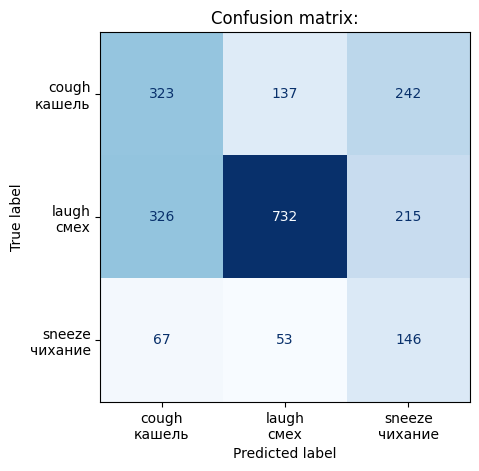

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.523    |0.597    |0.466    |
|laugh/смех          |0.640    |0.515    |0.846    |
|sneeze/чихание      |0.367    |0.575    |0.269    |
----------------------------------------------------
Weighted average Precision : 0.659                 |
----------------------------------------------------
Weighted average Recall : 0.548                    |
----------------------------------------------------
Weighted average F1 : 0.571                        |
----------------------------------------------------
Accuracy : 0.548                                   |
----------------------------------------------------

Confusion matrix:
[[419  96 187]
 [390 655 228]
 [ 90  23 153]]


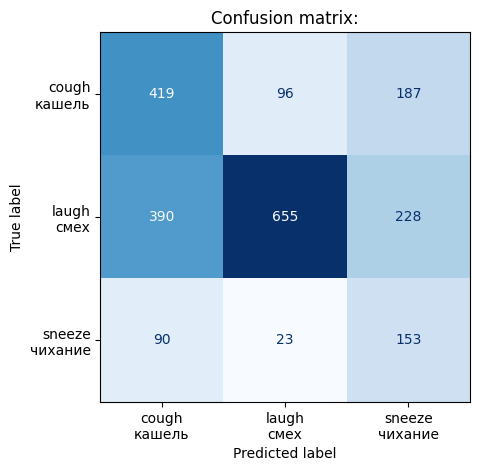

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.505    |0.620    |0.426    |
|laugh/смех          |0.617    |0.486    |0.843    |
|sneeze/чихание      |0.313    |0.444    |0.242    |
----------------------------------------------------
Weighted average Precision : 0.641                 |
----------------------------------------------------
Weighted average Recall : 0.523                    |
----------------------------------------------------
Weighted average F1 : 0.546                        |
----------------------------------------------------
Accuracy : 0.523                                   |
----------------------------------------------------

Confusion matrix:
[[435  84 183]
 [468 619 186]
 [117  31 118]]


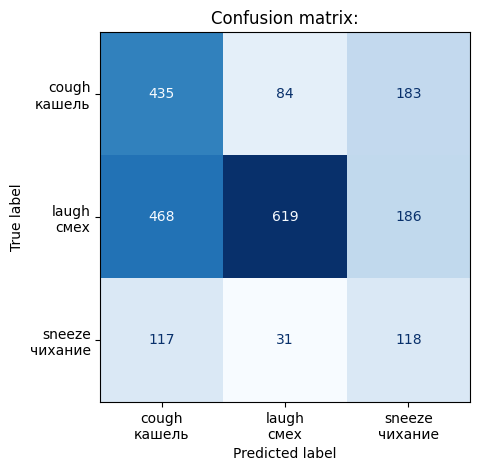

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.548    |0.632    |0.484    |
|laugh/смех          |0.669    |0.541    |0.874    |
|sneeze/чихание      |0.370    |0.556    |0.277    |
----------------------------------------------------
Weighted average Precision : 0.681                 |
----------------------------------------------------
Weighted average Recall : 0.572                    |
----------------------------------------------------
Weighted average F1 : 0.595                        |
----------------------------------------------------
Accuracy : 0.572                                   |
----------------------------------------------------

Confusion matrix:
[[444  81 177]
 [374 689 210]
 [100  18 148]]


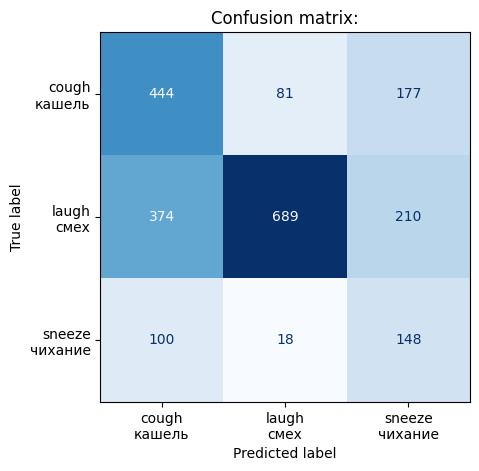

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.409    |0.429    |0.391    |
|laugh/смех          |0.575    |0.463    |0.760    |
|sneeze/чихание      |0.254    |0.459    |0.175    |
----------------------------------------------------
Weighted average Precision : 0.575                 |
----------------------------------------------------
Weighted average Recall : 0.452                    |
----------------------------------------------------
Weighted average F1 : 0.485                        |
----------------------------------------------------
Accuracy : 0.452                                   |
----------------------------------------------------

Confusion matrix:
[[301 130 271]
 [381 589 303]
 [ 88  56 122]]


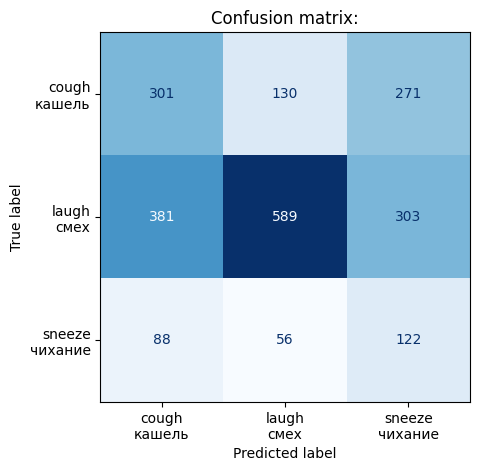

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.480    |0.496    |0.465    |
|laugh/смех          |0.638    |0.507    |0.858    |
|sneeze/чихание      |0.350    |0.662    |0.238    |
----------------------------------------------------
Weighted average Precision : 0.661                 |
----------------------------------------------------
Weighted average Recall : 0.522                    |
----------------------------------------------------
Weighted average F1 : 0.554                        |
----------------------------------------------------
Accuracy : 0.522                                   |
----------------------------------------------------

Confusion matrix:
[[348  83 271]
 [335 646 292]
 [ 66  24 176]]


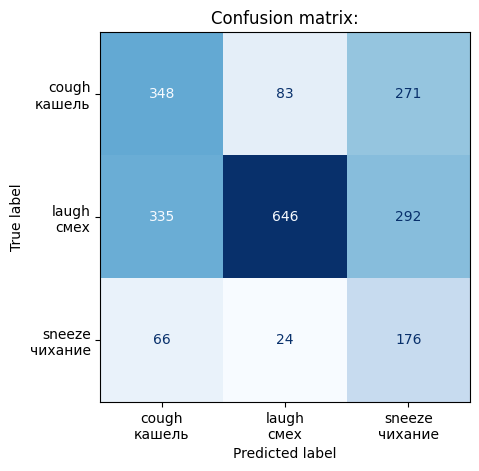

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.495    |0.534    |0.461    |
|laugh/смех          |0.632    |0.497    |0.867    |
|sneeze/чихание      |0.340    |0.617    |0.235    |
----------------------------------------------------
Weighted average Precision : 0.665                 |
----------------------------------------------------
Weighted average Recall : 0.523                    |
----------------------------------------------------
Weighted average F1 : 0.554                        |
----------------------------------------------------
Accuracy : 0.523                                   |
----------------------------------------------------

Confusion matrix:
[[375  81 246]
 [352 633 288]
 [ 86  16 164]]


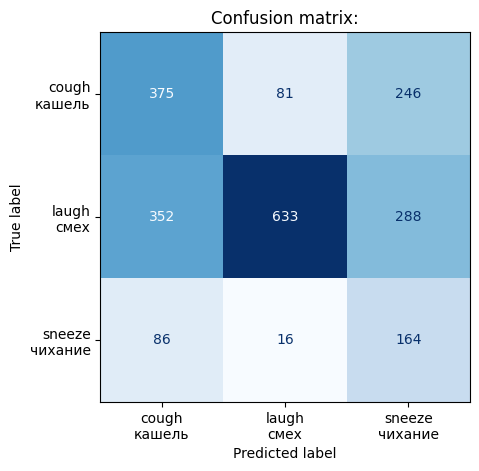

In [20]:
# vocalsound-train, nonspeech-test
cross_corpus(models, names, vocalsound_egemaps_dataset_pca, vocalsound_egemaps_targets, nonspeech_egemaps_dataset_pca, nonspeech_egemaps_targets)

# INTERSPEECH 2009

In [21]:
# Nonspeech7k
scaler.fit(nonspeech_IS09)
nonspeech_IS09_dataset_scaler = scaler.transform(nonspeech_IS09)

# Vocal Sound
scaler.fit(vocalsound_IS09)
vocalsound_IS09_dataset_scaler = scaler.transform(vocalsound_IS09)

In [22]:
pca = PCA(.95) 
pca.fit(nonspeech_IS09_dataset_scaler)
pca.fit(vocalsound_IS09_dataset_scaler)

nonspeech_IS09_dataset_pca = pca.transform(nonspeech_IS09_dataset_scaler)
vocalsound_IS09_dataset_pca = pca.transform(vocalsound_IS09_dataset_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.134    |0.080    |0.415    |
|laugh/смех          |0.534    |0.987    |0.366    |
|sneeze/чихание      |0.151    |0.083    |0.883    |
----------------------------------------------------
Weighted average Precision : 0.552                 |
----------------------------------------------------
Weighted average Recall : 0.385                    |
----------------------------------------------------
Weighted average F1 : 0.273                        |
----------------------------------------------------
Accuracy : 0.385                                   |
----------------------------------------------------

Confusion matrix:
[[ 270 3080   29]
 [  35 3317    7]
 [ 345 2676  272]]


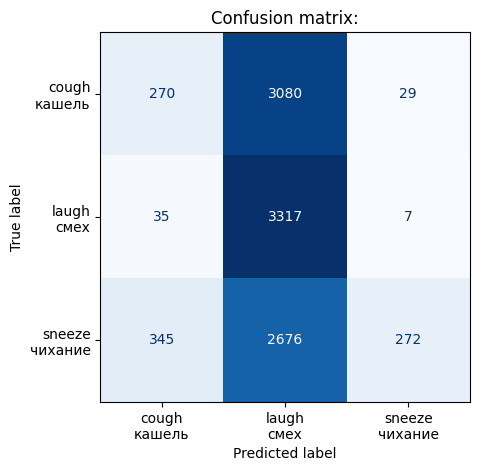

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.499    |0.464    |0.540    |
|laugh/смех          |0.615    |0.884    |0.472    |
|sneeze/чихание      |0.359    |0.225    |0.886    |
----------------------------------------------------
Weighted average Precision : 0.631                 |
----------------------------------------------------
Weighted average Recall : 0.526                    |
----------------------------------------------------
Weighted average F1 : 0.492                        |
----------------------------------------------------
Accuracy : 0.526                                   |
----------------------------------------------------

Confusion matrix:
[[1568 1734   77]
 [ 371 2970   18]
 [ 964 1588  741]]


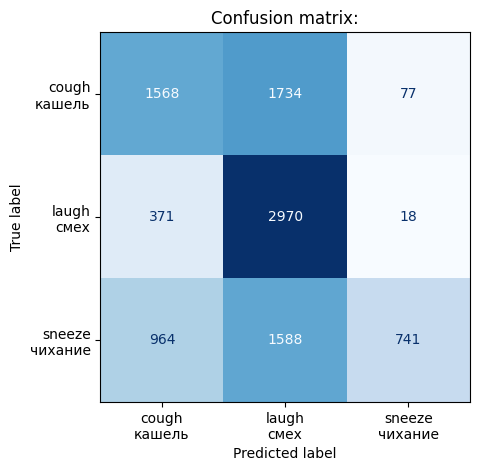

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.487    |0.506    |0.469    |
|laugh/смех          |0.576    |0.739    |0.471    |
|sneeze/чихание      |0.430    |0.288    |0.850    |
----------------------------------------------------
Weighted average Precision : 0.595                 |
----------------------------------------------------
Weighted average Recall : 0.512                    |
----------------------------------------------------
Weighted average F1 : 0.498                        |
----------------------------------------------------
Accuracy : 0.512                                   |
----------------------------------------------------

Confusion matrix:
[[1709 1536  134]
 [ 843 2483   33]
 [1094 1251  948]]


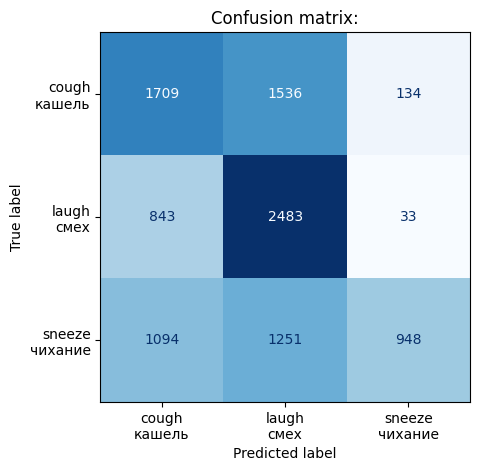

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.519    |0.492    |0.549    |
|laugh/смех          |0.610    |0.851    |0.475    |
|sneeze/чихание      |0.415    |0.270    |0.899    |
----------------------------------------------------
Weighted average Precision : 0.639                 |
----------------------------------------------------
Weighted average Recall : 0.539                    |
----------------------------------------------------
Weighted average F1 : 0.515                        |
----------------------------------------------------
Accuracy : 0.539                                   |
----------------------------------------------------

Confusion matrix:
[[1664 1647   68]
 [ 470 2857   32]
 [ 898 1507  888]]


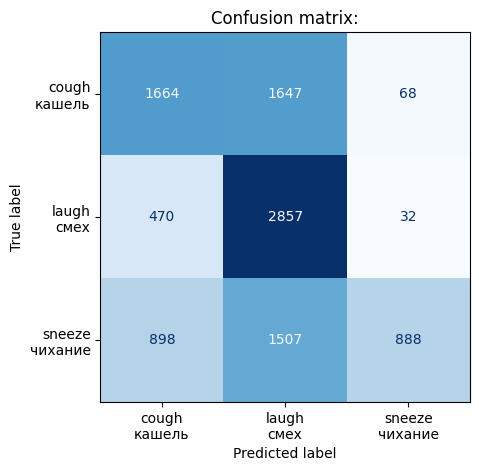

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.381    |0.338    |0.437    |
|laugh/смех          |0.546    |0.829    |0.407    |
|sneeze/чихание      |0.227    |0.133    |0.760    |
----------------------------------------------------
Weighted average Precision : 0.533                 |
----------------------------------------------------
Weighted average Recall : 0.435                    |
----------------------------------------------------
Weighted average F1 : 0.386                        |
----------------------------------------------------
Accuracy : 0.435                                   |
----------------------------------------------------

Confusion matrix:
[[1141 2140   98]
 [ 532 2786   41]
 [ 937 1917  439]]


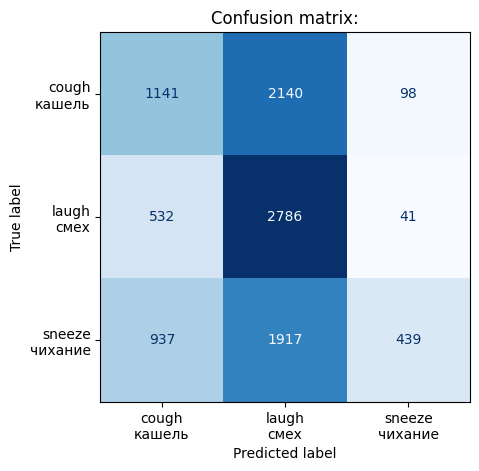

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.505    |0.477    |0.536    |
|laugh/смех          |0.598    |0.815    |0.472    |
|sneeze/чихание      |0.453    |0.311    |0.836    |
----------------------------------------------------
Weighted average Precision : 0.613                 |
----------------------------------------------------
Weighted average Recall : 0.536                    |
----------------------------------------------------
Weighted average F1 : 0.519                        |
----------------------------------------------------
Accuracy : 0.536                                   |
----------------------------------------------------

Confusion matrix:
[[1613 1623  143]
 [ 563 2739   57]
 [ 834 1436 1023]]


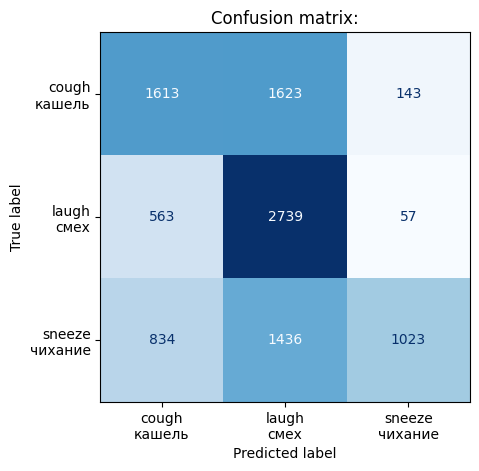

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.386    |0.392    |0.380    |
|laugh/смех          |0.499    |0.641    |0.408    |
|sneeze/чихание      |0.285    |0.197    |0.511    |
----------------------------------------------------
Weighted average Precision : 0.433                 |
----------------------------------------------------
Weighted average Recall : 0.411                    |
----------------------------------------------------
Weighted average F1 : 0.390                        |
----------------------------------------------------
Accuracy : 0.411                                   |
----------------------------------------------------

Confusion matrix:
[[1323 1720  336]
 [ 920 2154  285]
 [1240 1403  650]]


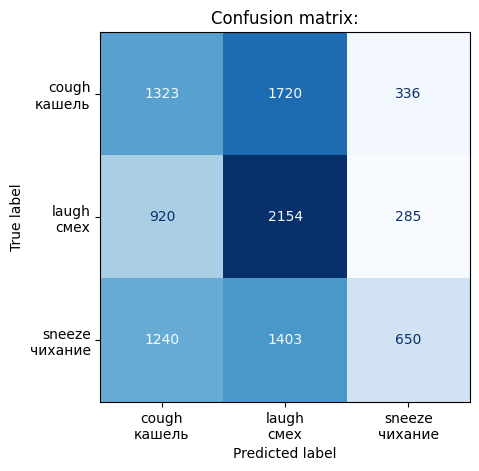

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.534    |0.503    |0.569    |
|laugh/смех          |0.611    |0.833    |0.483    |
|sneeze/чихание      |0.465    |0.321    |0.840    |
----------------------------------------------------
Weighted average Precision : 0.629                 |
----------------------------------------------------
Weighted average Recall : 0.553                    |
----------------------------------------------------
Weighted average F1 : 0.537                        |
----------------------------------------------------
Accuracy : 0.553                                   |
----------------------------------------------------

Confusion matrix:
[[1698 1552  129]
 [ 490 2797   72]
 [ 794 1442 1057]]


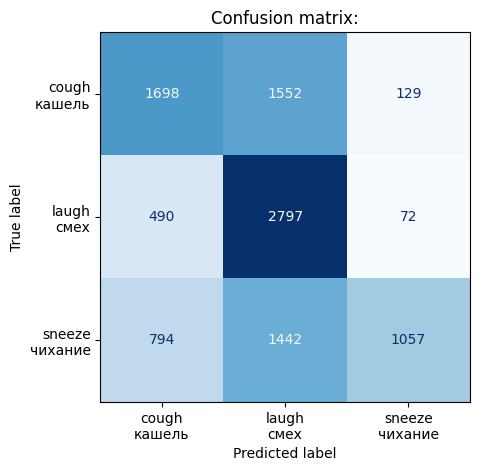

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.524    |0.484    |0.570    |
|laugh/смех          |0.618    |0.852    |0.485    |
|sneeze/чихание      |0.462    |0.320    |0.834    |
----------------------------------------------------
Weighted average Precision : 0.629                 |
----------------------------------------------------
Weighted average Recall : 0.553                    |
----------------------------------------------------
Weighted average F1 : 0.535                        |
----------------------------------------------------
Accuracy : 0.553                                   |
----------------------------------------------------

Confusion matrix:
[[1637 1596  146]
 [ 434 2862   63]
 [ 799 1441 1053]]


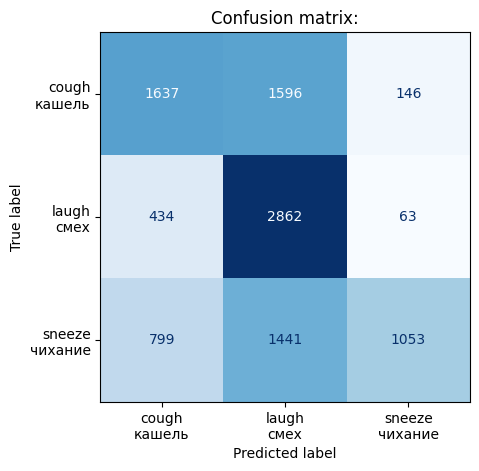

In [23]:
# nonspeech - train, vocalsound-test
cross_corpus(models, names, nonspeech_IS09_dataset_pca, nonspeech_IS09_targets, vocalsound_IS09_dataset_pca, vocalsound_IS09_targets)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.527    |0.726    |0.413    |
|laugh/смех          |0.464    |0.324    |0.822    |
|sneeze/чихание      |0.490    |0.711    |0.374    |
----------------------------------------------------
Weighted average Precision : 0.641                 |
----------------------------------------------------
Weighted average Recall : 0.496                    |
----------------------------------------------------
Weighted average F1 : 0.487                        |
----------------------------------------------------
Accuracy : 0.496                                   |
----------------------------------------------------

Confusion matrix:
[[510  73 119]
 [663 412 198]
 [ 61  16 189]]


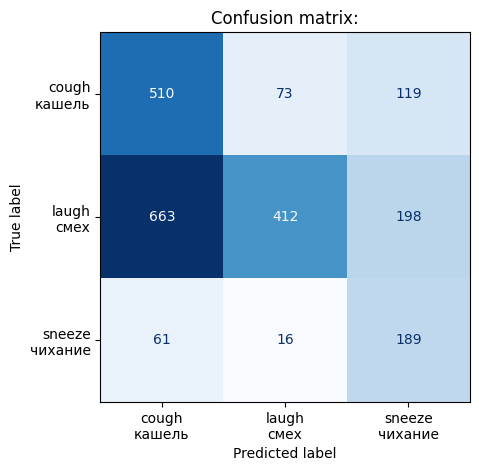

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.583    |0.608    |0.559    |
|laugh/смех          |0.583    |0.452    |0.821    |
|sneeze/чихание      |0.436    |0.853    |0.293    |
----------------------------------------------------
Weighted average Precision : 0.676                 |
----------------------------------------------------
Weighted average Recall : 0.549                    |
----------------------------------------------------
Weighted average F1 : 0.566                        |
----------------------------------------------------
Accuracy : 0.549                                   |
----------------------------------------------------

Confusion matrix:
[[427 105 170]
 [319 576 378]
 [ 18  21 227]]


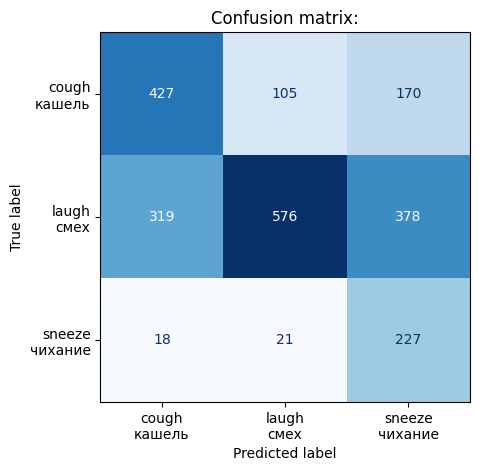

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.521    |0.577    |0.475    |
|laugh/смех          |0.544    |0.424    |0.759    |
|sneeze/чихание      |0.399    |0.707    |0.278    |
----------------------------------------------------
Weighted average Precision : 0.613                 |
----------------------------------------------------
Weighted average Recall : 0.506                    |
----------------------------------------------------
Weighted average F1 : 0.520                        |
----------------------------------------------------
Accuracy : 0.506                                   |
----------------------------------------------------

Confusion matrix:
[[405 144 153]
 [397 540 336]
 [ 51  27 188]]


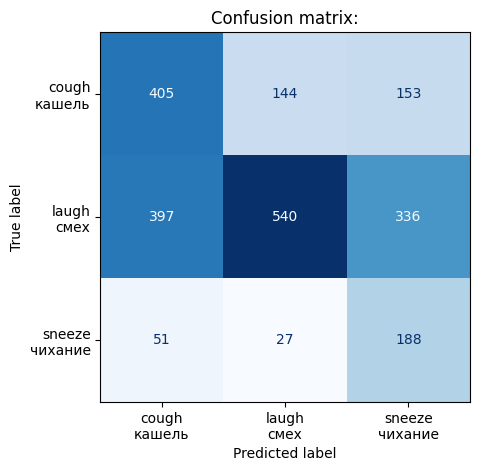

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.587    |0.640    |0.542    |
|laugh/смех          |0.621    |0.500    |0.818    |
|sneeze/чихание      |0.449    |0.759    |0.319    |
----------------------------------------------------
Weighted average Precision : 0.672                 |
----------------------------------------------------
Weighted average Recall : 0.575                    |
----------------------------------------------------
Weighted average F1 : 0.590                        |
----------------------------------------------------
Accuracy : 0.575                                   |
----------------------------------------------------

Confusion matrix:
[[449 119 134]
 [338 637 298]
 [ 41  23 202]]


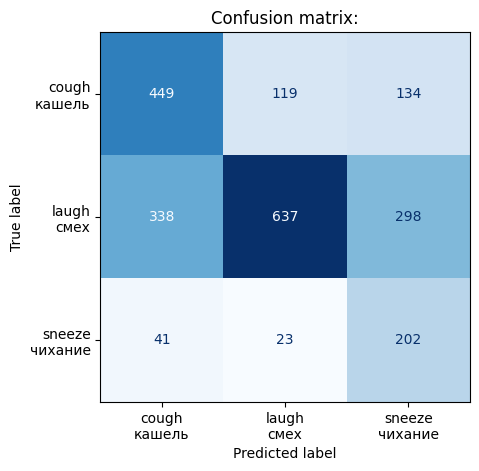

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.495    |0.698    |0.384    |
|laugh/смех          |0.402    |0.272    |0.772    |
|sneeze/чихание      |0.396    |0.583    |0.300    |
----------------------------------------------------
Weighted average Precision : 0.595                 |
----------------------------------------------------
Weighted average Recall : 0.442                    |
----------------------------------------------------
Weighted average F1 : 0.431                        |
----------------------------------------------------
Accuracy : 0.442                                   |
----------------------------------------------------

Confusion matrix:
[[490  75 137]
 [702 346 225]
 [ 84  27 155]]


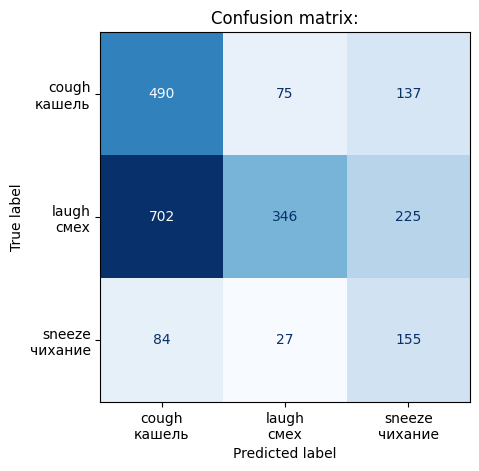

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.593    |0.644    |0.549    |
|laugh/смех          |0.594    |0.467    |0.816    |
|sneeze/чихание      |0.448    |0.805    |0.310    |
----------------------------------------------------
Weighted average Precision : 0.672                 |
----------------------------------------------------
Weighted average Recall : 0.562                    |
----------------------------------------------------
Weighted average F1 : 0.576                        |
----------------------------------------------------
Accuracy : 0.562                                   |
----------------------------------------------------

Confusion matrix:
[[452 116 134]
 [337 594 342]
 [ 34  18 214]]


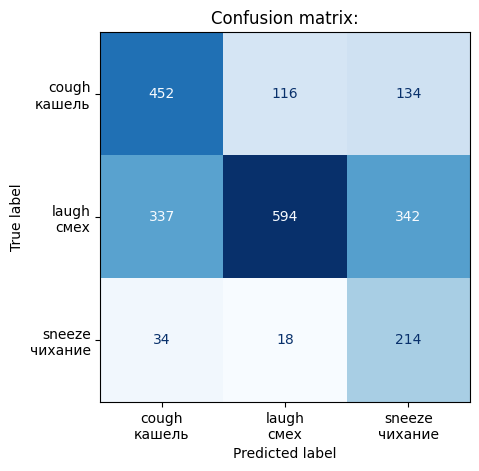

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.386    |0.419    |0.359    |
|laugh/смех          |0.501    |0.404    |0.661    |
|sneeze/чихание      |0.262    |0.447    |0.185    |
----------------------------------------------------
Weighted average Precision : 0.510                 |
----------------------------------------------------
Weighted average Recall : 0.414                    |
----------------------------------------------------
Weighted average F1 : 0.437                        |
----------------------------------------------------
Accuracy : 0.414                                   |
----------------------------------------------------

Confusion matrix:
[[294 206 202]
 [437 514 322]
 [ 89  58 119]]


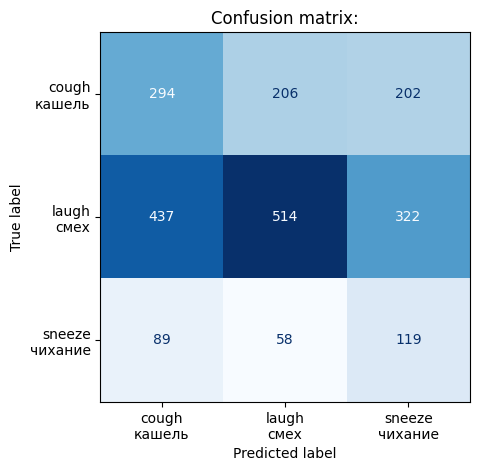

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.587    |0.610    |0.566    |
|laugh/смех          |0.607    |0.484    |0.815    |
|sneeze/чихание      |0.436    |0.816    |0.298    |
----------------------------------------------------
Weighted average Precision : 0.676                 |
----------------------------------------------------
Weighted average Recall : 0.563                    |
----------------------------------------------------
Weighted average F1 : 0.581                        |
----------------------------------------------------
Accuracy : 0.563                                   |
----------------------------------------------------

Confusion matrix:
[[428 116 158]
 [303 616 354]
 [ 25  24 217]]


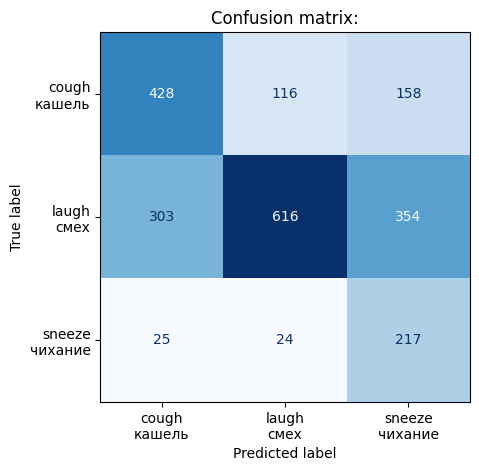

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.575    |0.605    |0.547    |
|laugh/смех          |0.593    |0.468    |0.810    |
|sneeze/чихание      |0.437    |0.816    |0.298    |
----------------------------------------------------
Weighted average Precision : 0.667                 |
----------------------------------------------------
Weighted average Recall : 0.552                    |
----------------------------------------------------
Weighted average F1 : 0.569                        |
----------------------------------------------------
Accuracy : 0.552                                   |
----------------------------------------------------

Confusion matrix:
[[425 122 155]
 [321 596 356]
 [ 31  18 217]]


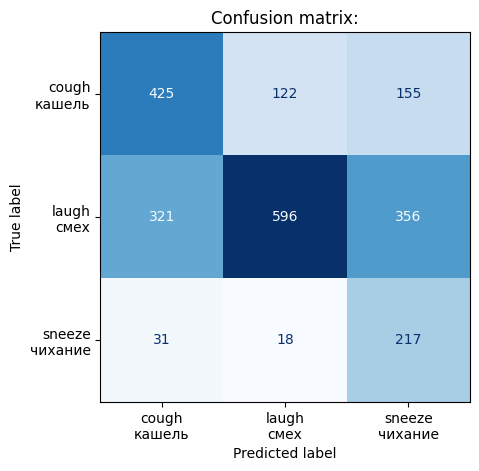

In [24]:
# vocalsound-train, nonspeech-test
cross_corpus(models, names, vocalsound_IS09_dataset_pca, vocalsound_IS09_targets, nonspeech_IS09_dataset_pca, nonspeech_IS09_targets)

# INTERSPEECH 2010

In [26]:
# Nonspeech7k
scaler.fit(nonspeech_IS10)
nonspeech_IS10_dataset_scaler = scaler.transform(nonspeech_IS10)

# Vocal Sound
scaler.fit(vocalsound_IS10)
vocalsound_IS10_dataset_scaler = scaler.transform(vocalsound_IS10)

In [27]:
pca = PCA(.95) 
pca.fit(nonspeech_IS10_dataset_scaler)
pca.fit(vocalsound_IS10_dataset_scaler)

nonspeech_IS10_dataset_pca = pca.transform(nonspeech_IS10_dataset_scaler)
vocalsound_IS10_dataset_pca = pca.transform(vocalsound_IS10_dataset_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.327    |0.227    |0.587    |
|laugh/смех          |0.535    |0.943    |0.374    |
|sneeze/чихание      |0.112    |0.060    |0.780    |
----------------------------------------------------
Weighted average Precision : 0.579                 |
----------------------------------------------------
Weighted average Recall : 0.412                    |
----------------------------------------------------
Weighted average F1 : 0.326                        |
----------------------------------------------------
Accuracy : 0.412                                   |
----------------------------------------------------

Confusion matrix:
[[ 767 2584   28]
 [ 164 3167   28]
 [ 376 2719  198]]


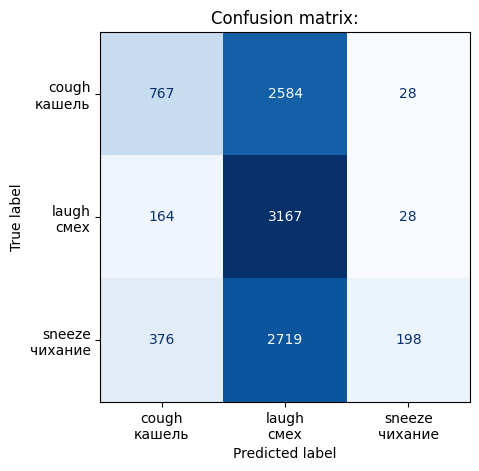

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.658    |0.692    |0.628    |
|laugh/смех          |0.676    |0.899    |0.541    |
|sneeze/чихание      |0.305    |0.186    |0.843    |
----------------------------------------------------
Weighted average Precision : 0.669                 |
----------------------------------------------------
Weighted average Recall : 0.595                    |
----------------------------------------------------
Weighted average F1 : 0.548                        |
----------------------------------------------------
Accuracy : 0.595                                   |
----------------------------------------------------

Confusion matrix:
[[2338  984   57]
 [ 282 3020   57]
 [1105 1575  613]]


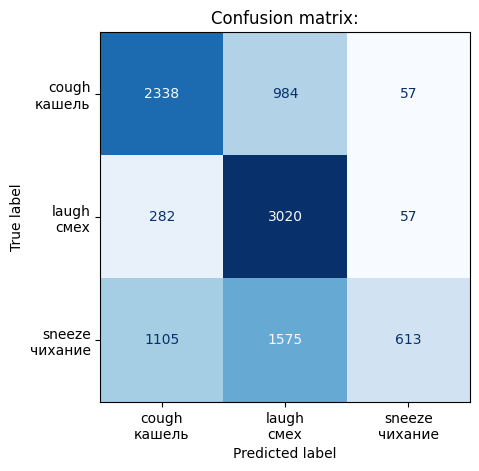

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.551    |0.541    |0.561    |
|laugh/смех          |0.652    |0.770    |0.566    |
|sneeze/чихание      |0.503    |0.420    |0.627    |
----------------------------------------------------
Weighted average Precision : 0.584                 |
----------------------------------------------------
Weighted average Recall : 0.578                    |
----------------------------------------------------
Weighted average F1 : 0.569                        |
----------------------------------------------------
Accuracy : 0.578                                   |
----------------------------------------------------

Confusion matrix:
[[1827 1054  498]
 [ 451 2585  323]
 [ 978  932 1383]]


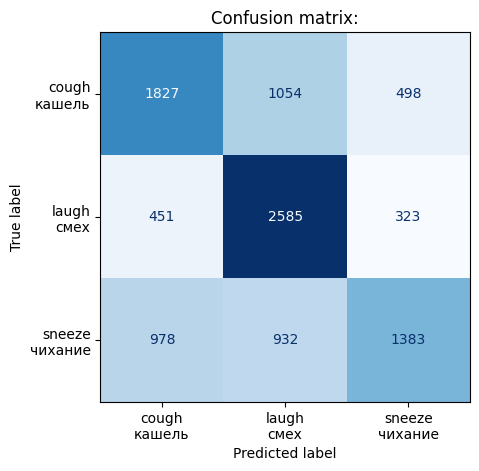

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.643    |0.654    |0.633    |
|laugh/смех          |0.679    |0.881    |0.553    |
|sneeze/чихание      |0.426    |0.289    |0.804    |
----------------------------------------------------
Weighted average Precision : 0.662                 |
----------------------------------------------------
Weighted average Recall : 0.610                    |
----------------------------------------------------
Weighted average F1 : 0.584                        |
----------------------------------------------------
Accuracy : 0.610                                   |
----------------------------------------------------

Confusion matrix:
[[2209 1049  121]
 [ 289 2959  111]
 [ 994 1346  953]]


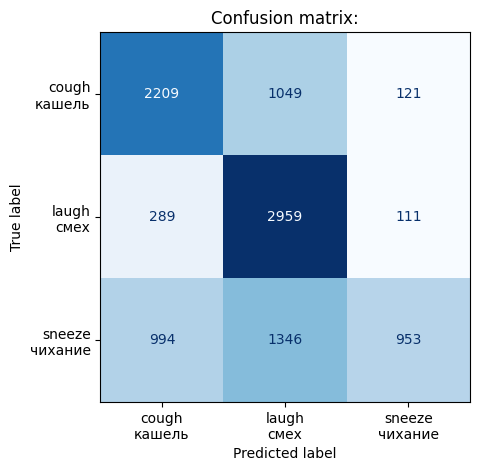

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.515    |0.475    |0.561    |
|laugh/смех          |0.559    |0.813    |0.426    |
|sneeze/чихание      |0.195    |0.120    |0.525    |
----------------------------------------------------
Weighted average Precision : 0.504                 |
----------------------------------------------------
Weighted average Recall : 0.472                    |
----------------------------------------------------
Weighted average F1 : 0.425                        |
----------------------------------------------------
Accuracy : 0.472                                   |
----------------------------------------------------

Confusion matrix:
[[1606 1568  205]
 [ 474 2732  153]
 [ 782 2116  395]]


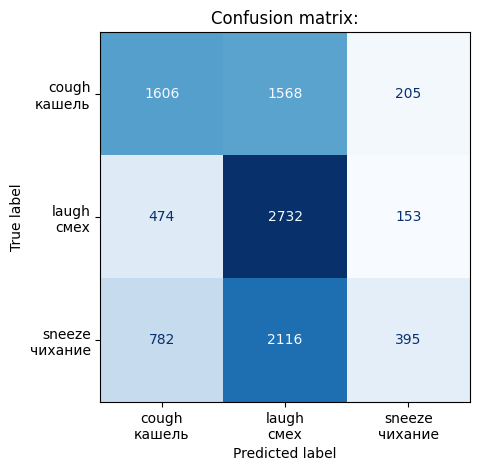

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.662    |0.688    |0.638    |
|laugh/смех          |0.696    |0.848    |0.590    |
|sneeze/чихание      |0.503    |0.371    |0.782    |
----------------------------------------------------
Weighted average Precision : 0.669                 |
----------------------------------------------------
Weighted average Recall : 0.638                    |
----------------------------------------------------
Weighted average F1 : 0.621                        |
----------------------------------------------------
Accuracy : 0.638                                   |
----------------------------------------------------

Confusion matrix:
[[2324  854  201]
 [ 370 2850  139]
 [ 946 1126 1221]]


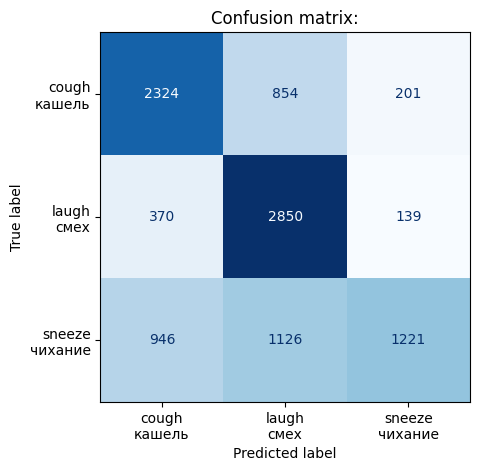

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.535    |0.582    |0.496    |
|laugh/смех          |0.515    |0.626    |0.437    |
|sneeze/чихание      |0.193    |0.133    |0.351    |
----------------------------------------------------
Weighted average Precision : 0.429                 |
----------------------------------------------------
Weighted average Recall : 0.450                    |
----------------------------------------------------
Weighted average F1 : 0.416                        |
----------------------------------------------------
Accuracy : 0.450                                   |
----------------------------------------------------

Confusion matrix:
[[1967 1084  328]
 [ 773 2103  483]
 [1229 1625  439]]


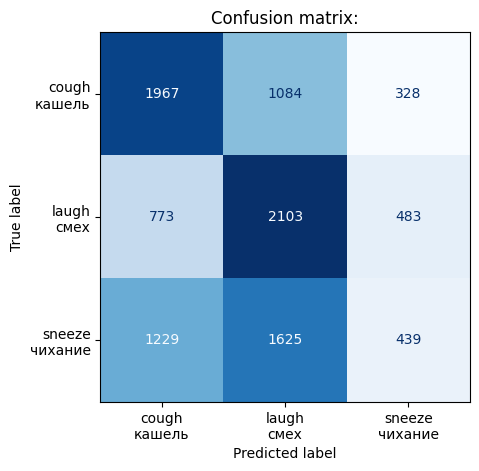

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.646    |0.657    |0.635    |
|laugh/смех          |0.661    |0.866    |0.535    |
|sneeze/чихание      |0.401    |0.267    |0.801    |
----------------------------------------------------
Weighted average Precision : 0.656                 |
----------------------------------------------------
Weighted average Recall : 0.599                    |
----------------------------------------------------
Weighted average F1 : 0.570                        |
----------------------------------------------------
Accuracy : 0.599                                   |
----------------------------------------------------

Confusion matrix:
[[2219 1064   96]
 [ 329 2908  122]
 [ 945 1468  880]]


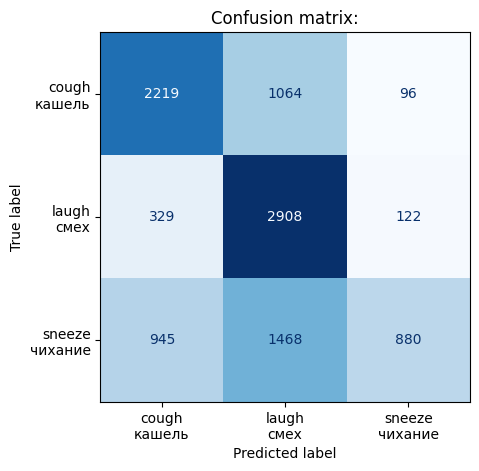

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.661    |0.680    |0.643    |
|laugh/смех          |0.648    |0.861    |0.519    |
|sneeze/чихание      |0.349    |0.222    |0.823    |
----------------------------------------------------
Weighted average Precision : 0.661                 |
----------------------------------------------------
Weighted average Recall : 0.590                    |
----------------------------------------------------
Weighted average F1 : 0.554                        |
----------------------------------------------------
Accuracy : 0.590                                   |
----------------------------------------------------

Confusion matrix:
[[2297  995   87]
 [ 397 2892   70]
 [ 879 1684  730]]


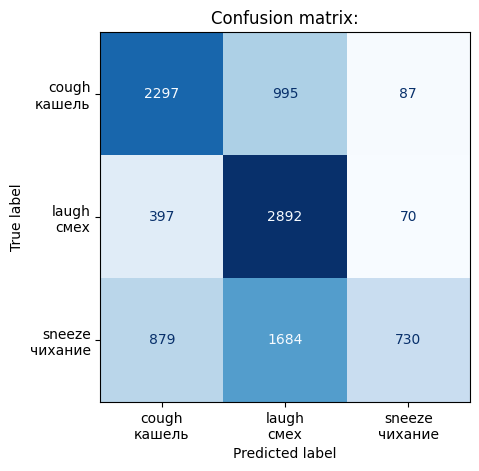

In [28]:
# nonspeech - train, vocalsound-test
cross_corpus(models, names, nonspeech_IS10_dataset_pca, nonspeech_IS10_targets, vocalsound_IS10_dataset_pca, vocalsound_IS10_targets)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.575    |0.820    |0.443    |
|laugh/смех          |0.431    |0.286    |0.878    |
|sneeze/чихание      |0.418    |0.619    |0.315    |
----------------------------------------------------
Weighted average Precision : 0.674                 |
----------------------------------------------------
Weighted average Recall : 0.494                    |
----------------------------------------------------
Weighted average F1 : 0.475                        |
----------------------------------------------------
Accuracy : 0.494                                   |
----------------------------------------------------

Confusion matrix:
[[1036   54  174]
 [1158  648  460]
 [ 144   36  292]]


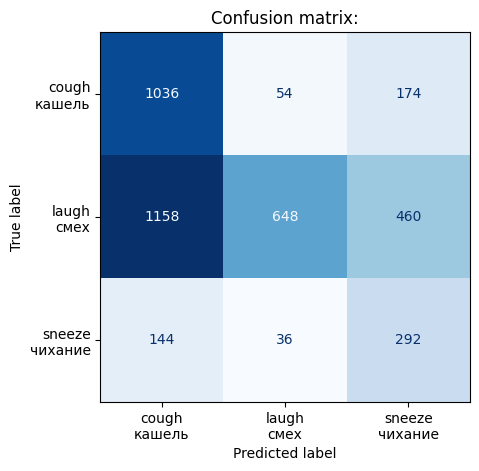

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.741    |0.739    |0.744    |
|laugh/смех          |0.727    |0.603    |0.916    |
|sneeze/чихание      |0.433    |0.792    |0.298    |
----------------------------------------------------
Weighted average Precision : 0.788                 |
----------------------------------------------------
Weighted average Recall : 0.668                    |
----------------------------------------------------
Weighted average F1 : 0.697                        |
----------------------------------------------------
Accuracy : 0.668                                   |
----------------------------------------------------

Confusion matrix:
[[ 934   78  252]
 [ 272 1366  628]
 [  50   48  374]]


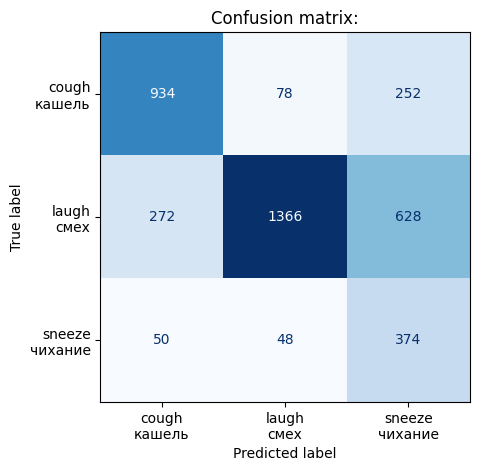

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.474    |0.396    |0.591    |
|laugh/смех          |0.615    |0.501    |0.796    |
|sneeze/чихание      |0.320    |0.746    |0.204    |
----------------------------------------------------
Weighted average Precision : 0.661                 |
----------------------------------------------------
Weighted average Recall : 0.497                    |
----------------------------------------------------
Weighted average F1 : 0.536                        |
----------------------------------------------------
Accuracy : 0.497                                   |
----------------------------------------------------

Confusion matrix:
[[ 500  208  556]
 [ 310 1136  820]
 [  36   84  352]]


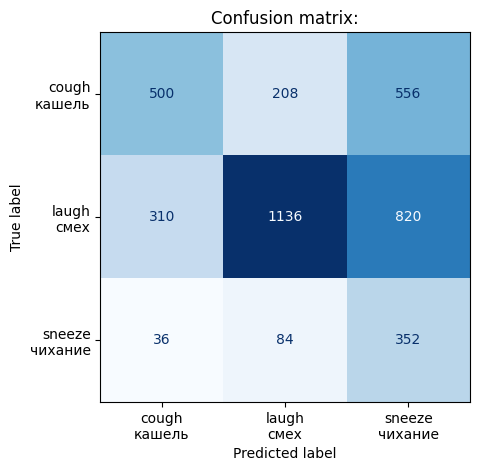

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.740    |0.775    |0.707    |
|laugh/смех          |0.704    |0.579    |0.899    |
|sneeze/чихание      |0.428    |0.737    |0.301    |
----------------------------------------------------
Weighted average Precision : 0.768                 |
----------------------------------------------------
Weighted average Recall : 0.660                    |
----------------------------------------------------
Weighted average F1 : 0.683                        |
----------------------------------------------------
Accuracy : 0.660                                   |
----------------------------------------------------

Confusion matrix:
[[ 980   98  186]
 [ 332 1312  622]
 [  74   50  348]]


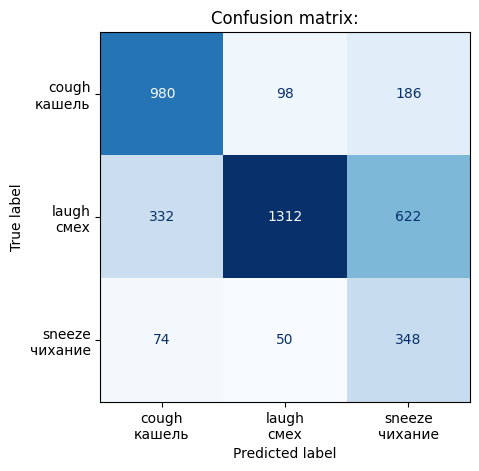

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.547    |0.729    |0.437    |
|laugh/смех          |0.420    |0.277    |0.863    |
|sneeze/чихание      |0.276    |0.479    |0.194    |
----------------------------------------------------
Weighted average Precision : 0.649                 |
----------------------------------------------------
Weighted average Recall : 0.444                    |
----------------------------------------------------
Weighted average F1 : 0.443                        |
----------------------------------------------------
Accuracy : 0.444                                   |
----------------------------------------------------

Confusion matrix:
[[922  54 288]
 [988 628 650]
 [200  46 226]]


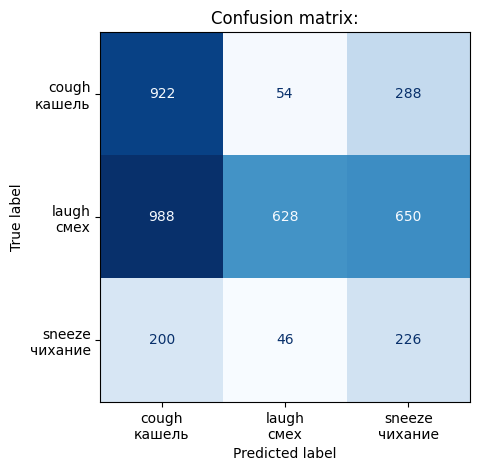

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.727    |0.764    |0.693    |
|laugh/смех          |0.722    |0.605    |0.897    |
|sneeze/чихание      |0.425    |0.699    |0.306    |
----------------------------------------------------
Weighted average Precision : 0.763                 |
----------------------------------------------------
Weighted average Recall : 0.666                    |
----------------------------------------------------
Weighted average F1 : 0.689                        |
----------------------------------------------------
Accuracy : 0.666                                   |
----------------------------------------------------

Confusion matrix:
[[ 966  104  194]
 [ 340 1370  556]
 [  88   54  330]]


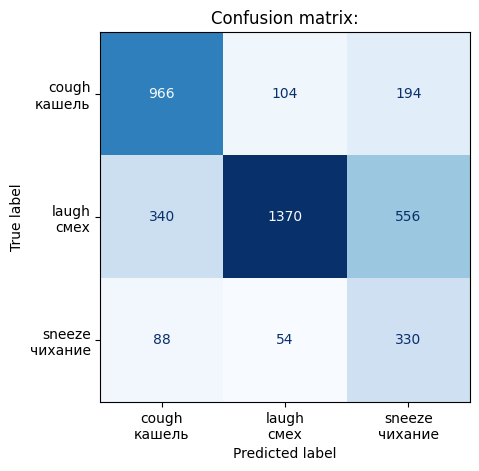

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.522    |0.560    |0.488    |
|laugh/смех          |0.539    |0.417    |0.762    |
|sneeze/чихание      |0.242    |0.458    |0.165    |
----------------------------------------------------
Weighted average Precision : 0.605                 |
----------------------------------------------------
Weighted average Recall : 0.467                    |
----------------------------------------------------
Weighted average F1 : 0.499                        |
----------------------------------------------------
Accuracy : 0.467                                   |
----------------------------------------------------

Confusion matrix:
[[708 162 394]
 [620 946 700]
 [122 134 216]]


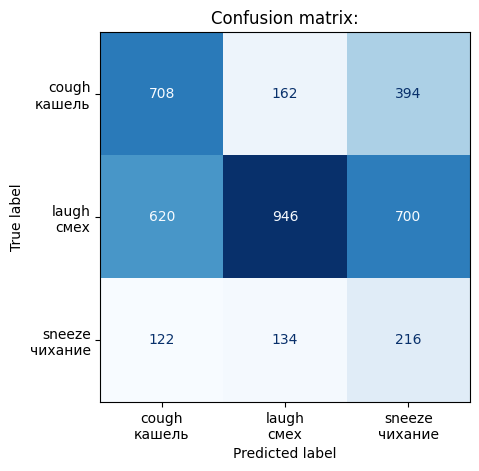

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.719    |0.748    |0.693    |
|laugh/смех          |0.704    |0.581    |0.894    |
|sneeze/чихание      |0.418    |0.725    |0.294    |
----------------------------------------------------
Weighted average Precision : 0.760                 |
----------------------------------------------------
Weighted average Recall : 0.651                    |
----------------------------------------------------
Weighted average F1 : 0.675                        |
----------------------------------------------------
Accuracy : 0.651                                   |
----------------------------------------------------

Confusion matrix:
[[ 946  100  218]
 [ 346 1316  604]
 [  74   56  342]]


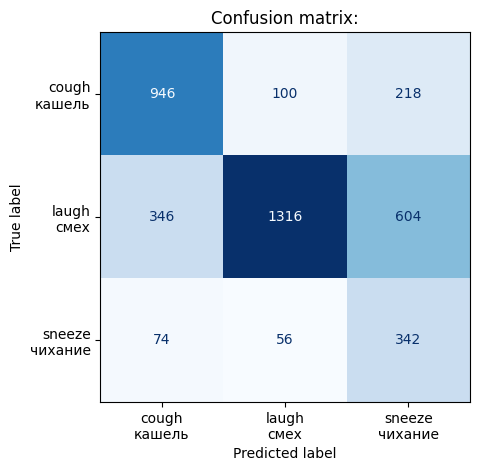

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.734    |0.745    |0.722    |
|laugh/смех          |0.705    |0.590    |0.875    |
|sneeze/чихание      |0.423    |0.737    |0.297    |
----------------------------------------------------
Weighted average Precision : 0.759                 |
----------------------------------------------------
Weighted average Recall : 0.656                    |
----------------------------------------------------
Weighted average F1 : 0.681                        |
----------------------------------------------------
Accuracy : 0.656                                   |
----------------------------------------------------

Confusion matrix:
[[ 942  128  194]
 [ 300 1336  630]
 [  62   62  348]]


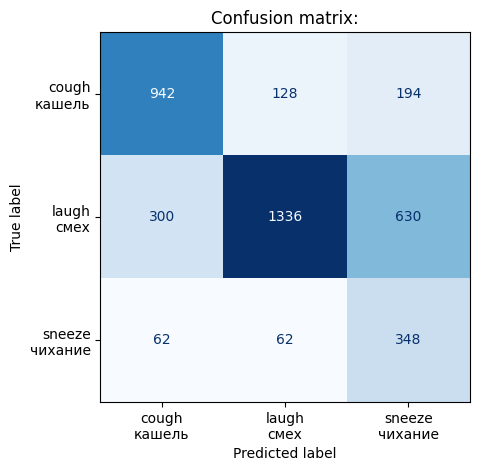

In [29]:
# vocalsound-train, nonspeech-test
cross_corpus(models, names, vocalsound_IS10_dataset_pca, vocalsound_IS10_targets, nonspeech_IS10_dataset_pca, nonspeech_IS10_targets)

# INTERSPEECH 2013

In [30]:
# Nonspeech7k
scaler.fit(nonspeech_IS13)
nonspeech_IS13_dataset_scaler = scaler.transform(nonspeech_IS13)

# Vocal Sound
scaler.fit(vocalsound_IS13)
vocalsound_IS13_dataset_scaler = scaler.transform(vocalsound_IS13)

In [31]:
pca = PCA(.95) 
pca.fit(nonspeech_IS13_dataset_scaler)
pca.fit(vocalsound_IS13_dataset_scaler)

nonspeech_IS13_dataset_pca = pca.transform(nonspeech_IS13_dataset_scaler)
vocalsound_IS13_dataset_pca = pca.transform(vocalsound_IS13_dataset_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.167    |0.097    |0.575    |
|laugh/смех          |0.518    |0.980    |0.352    |
|sneeze/чихание      |0.044    |0.023    |0.701    |
----------------------------------------------------
Weighted average Precision : 0.542                 |
----------------------------------------------------
Weighted average Recall : 0.369                    |
----------------------------------------------------
Weighted average F1 : 0.244                        |
----------------------------------------------------
Accuracy : 0.369                                   |
----------------------------------------------------

Confusion matrix:
[[ 329 3026   24]
 [  58 3293    8]
 [ 185 3033   75]]


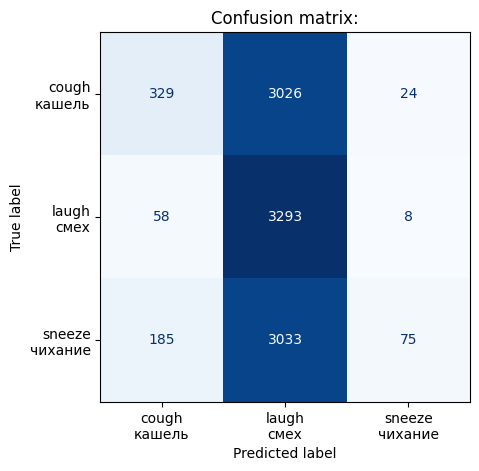

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.623    |0.609    |0.638    |
|laugh/смех          |0.661    |0.947    |0.508    |
|sneeze/чихание      |0.266    |0.155    |0.932    |
----------------------------------------------------
Weighted average Precision : 0.691                 |
----------------------------------------------------
Weighted average Recall : 0.573                    |
----------------------------------------------------
Weighted average F1 : 0.519                        |
----------------------------------------------------
Accuracy : 0.573                                   |
----------------------------------------------------

Confusion matrix:
[[2058 1293   28]
 [ 169 3181    9]
 [ 998 1785  510]]


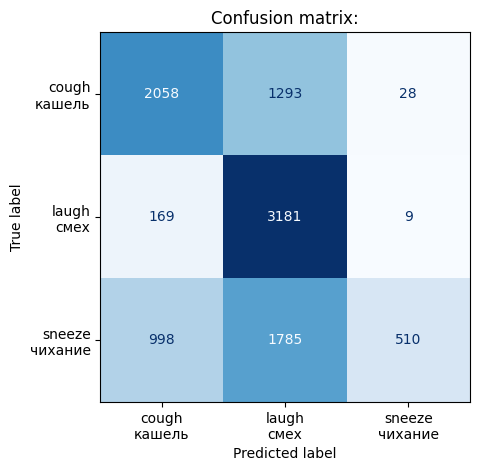

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.633    |0.621    |0.645    |
|laugh/смех          |0.705    |0.809    |0.624    |
|sneeze/чихание      |0.642    |0.557    |0.758    |
----------------------------------------------------
Weighted average Precision : 0.675                 |
----------------------------------------------------
Weighted average Recall : 0.663                    |
----------------------------------------------------
Weighted average F1 : 0.660                        |
----------------------------------------------------
Accuracy : 0.663                                   |
----------------------------------------------------

Confusion matrix:
[[2099  856  424]
 [ 479 2718  162]
 [ 676  783 1834]]


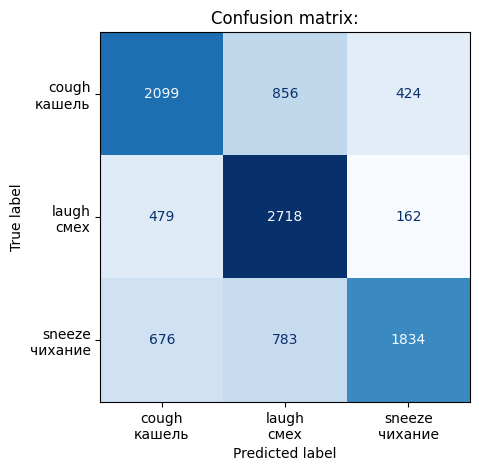

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.590    |0.587    |0.593    |
|laugh/смех          |0.657    |0.826    |0.546    |
|sneeze/чихание      |0.477    |0.355    |0.727    |
----------------------------------------------------
Weighted average Precision : 0.621                 |
----------------------------------------------------
Weighted average Recall : 0.591                    |
----------------------------------------------------
Weighted average F1 : 0.575                        |
----------------------------------------------------
Accuracy : 0.591                                   |
----------------------------------------------------

Confusion matrix:
[[1982 1132  265]
 [ 413 2773  173]
 [ 948 1176 1169]]


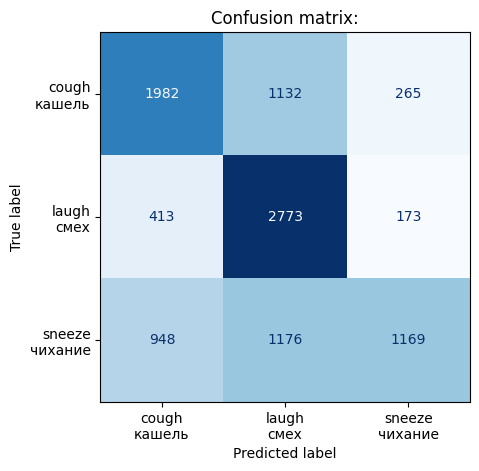

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.536    |0.500    |0.576    |
|laugh/смех          |0.569    |0.879    |0.421    |
|sneeze/чихание      |0.040    |0.020    |0.870    |
----------------------------------------------------
Weighted average Precision : 0.621                 |
----------------------------------------------------
Weighted average Recall : 0.470                    |
----------------------------------------------------
Weighted average F1 : 0.384                        |
----------------------------------------------------
Accuracy : 0.470                                   |
----------------------------------------------------

Confusion matrix:
[[1691 1680    8]
 [ 403 2954    2]
 [ 840 2386   67]]


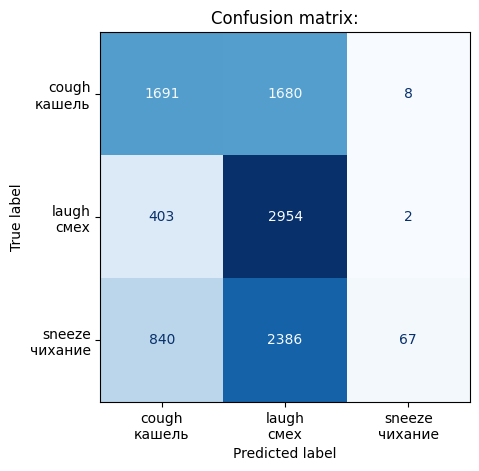

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.702    |0.700    |0.704    |
|laugh/смех          |0.747    |0.917    |0.630    |
|sneeze/чихание      |0.601    |0.463    |0.855    |
----------------------------------------------------
Weighted average Precision : 0.729                 |
----------------------------------------------------
Weighted average Recall : 0.695                    |
----------------------------------------------------
Weighted average F1 : 0.684                        |
----------------------------------------------------
Accuracy : 0.695                                   |
----------------------------------------------------

Confusion matrix:
[[2366  828  185]
 [ 207 3079   73]
 [ 790  979 1524]]


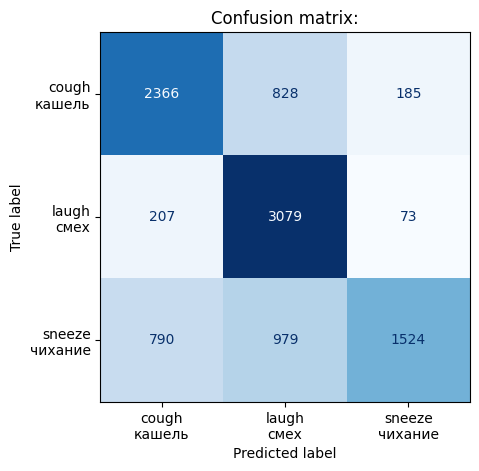

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.414    |0.420    |0.409    |
|laugh/смех          |0.516    |0.671    |0.419    |
|sneeze/чихание      |0.224    |0.152    |0.425    |
----------------------------------------------------
Weighted average Precision : 0.417                 |
----------------------------------------------------
Weighted average Recall : 0.416                    |
----------------------------------------------------
Weighted average F1 : 0.386                        |
----------------------------------------------------
Accuracy : 0.416                                   |
----------------------------------------------------

Confusion matrix:
[[1420 1588  371]
 [ 797 2253  309]
 [1259 1532  502]]


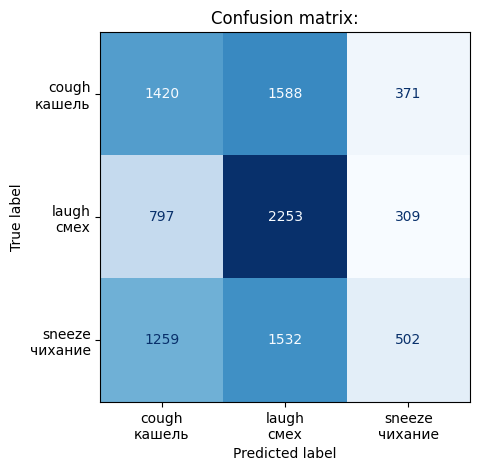

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.599    |0.582    |0.618    |
|laugh/смех          |0.661    |0.920    |0.516    |
|sneeze/чихание      |0.357    |0.226    |0.857    |
----------------------------------------------------
Weighted average Precision : 0.662                 |
----------------------------------------------------
Weighted average Recall : 0.578                    |
----------------------------------------------------
Weighted average F1 : 0.541                        |
----------------------------------------------------
Accuracy : 0.578                                   |
----------------------------------------------------

Confusion matrix:
[[1966 1328   85]
 [ 231 3089   39]
 [ 983 1567  743]]


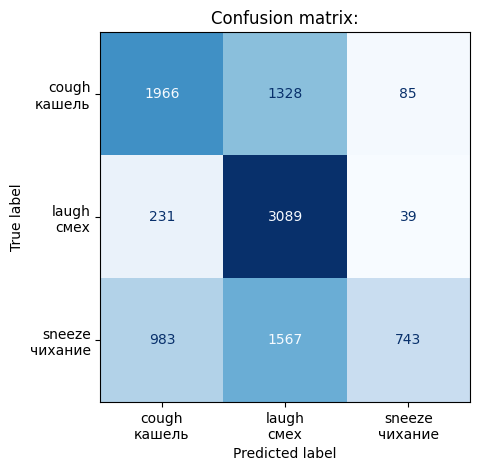

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.614    |0.628    |0.601    |
|laugh/смех          |0.669    |0.887    |0.537    |
|sneeze/чихание      |0.314    |0.202    |0.704    |
----------------------------------------------------
Weighted average Precision : 0.613                 |
----------------------------------------------------
Weighted average Recall : 0.575                    |
----------------------------------------------------
Weighted average F1 : 0.534                        |
----------------------------------------------------
Accuracy : 0.575                                   |
----------------------------------------------------

Confusion matrix:
[[2123 1064  192]
 [ 290 2981   88]
 [1119 1508  666]]


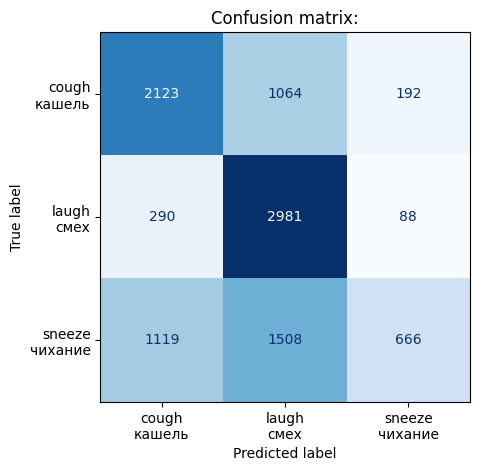

In [32]:
# nonspeech - train, vocalsound-test
cross_corpus(models, names, nonspeech_IS13_dataset_pca, nonspeech_IS13_targets, vocalsound_IS13_dataset_pca, vocalsound_IS13_targets)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.555    |0.802    |0.424    |
|laugh/смех          |0.524    |0.368    |0.914    |
|sneeze/чихание      |0.492    |0.617    |0.409    |
----------------------------------------------------
Weighted average Precision : 0.701                 |
----------------------------------------------------
Weighted average Recall : 0.533                    |
----------------------------------------------------
Weighted average F1 : 0.530                        |
----------------------------------------------------
Accuracy : 0.533                                   |
----------------------------------------------------

Confusion matrix:
[[563  35 104]
 [672 468 133]
 [ 93   9 164]]


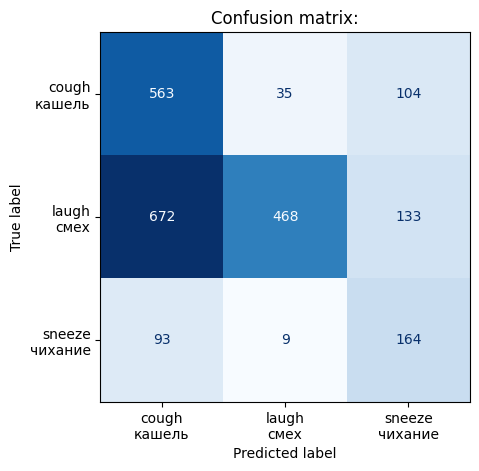

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.708    |0.678    |0.740    |
|laugh/смех          |0.803    |0.703    |0.936    |
|sneeze/чихание      |0.520    |0.887    |0.368    |
----------------------------------------------------
Weighted average Precision : 0.807                 |
----------------------------------------------------
Weighted average Recall : 0.717                    |
----------------------------------------------------
Weighted average F1 : 0.740                        |
----------------------------------------------------
Accuracy : 0.717                                   |
----------------------------------------------------

Confusion matrix:
[[476  50 176]
 [148 895 230]
 [ 19  11 236]]


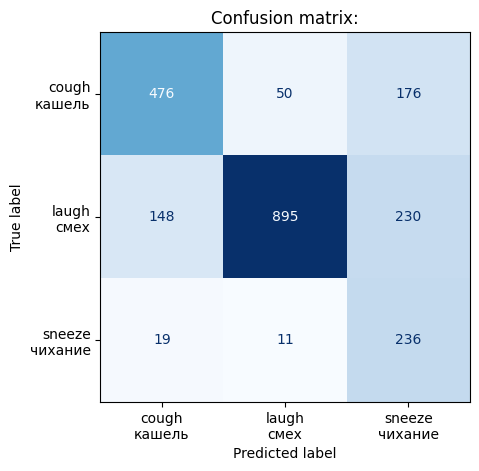

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.551    |0.875    |0.402    |
|laugh/смех          |0.500    |0.342    |0.928    |
|sneeze/чихание      |0.447    |0.429    |0.467    |
----------------------------------------------------
Weighted average Precision : 0.708                 |
----------------------------------------------------
Weighted average Recall : 0.519                    |
----------------------------------------------------
Weighted average F1 : 0.510                        |
----------------------------------------------------
Accuracy : 0.519                                   |
----------------------------------------------------

Confusion matrix:
[[614  25  63]
 [770 436  67]
 [143   9 114]]


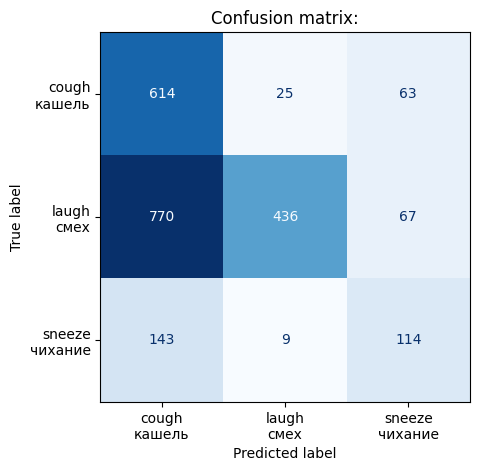

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.742    |0.738    |0.745    |
|laugh/смех          |0.800    |0.694    |0.945    |
|sneeze/чихание      |0.515    |0.850    |0.369    |
----------------------------------------------------
Weighted average Precision : 0.814                 |
----------------------------------------------------
Weighted average Recall : 0.726                    |
----------------------------------------------------
Weighted average F1 : 0.748                        |
----------------------------------------------------
Accuracy : 0.726                                   |
----------------------------------------------------

Confusion matrix:
[[518  43 141]
 [145 883 245]
 [ 32   8 226]]


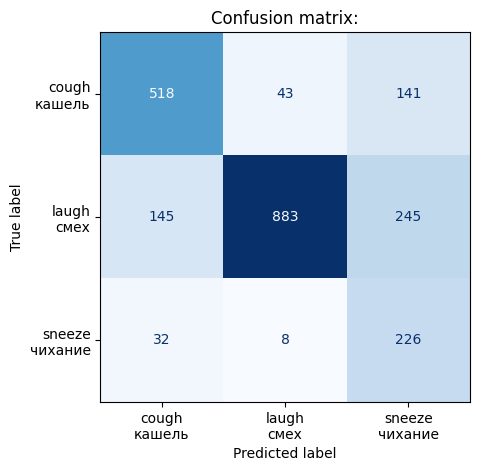

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.543    |0.789    |0.414    |
|laugh/смех          |0.574    |0.434    |0.848    |
|sneeze/чихание      |0.333    |0.323    |0.343    |
----------------------------------------------------
Weighted average Precision : 0.652                 |
----------------------------------------------------
Weighted average Recall : 0.532                    |
----------------------------------------------------
Weighted average F1 : 0.535                        |
----------------------------------------------------
Accuracy : 0.532                                   |
----------------------------------------------------

Confusion matrix:
[[554  72  76]
 [632 552  89]
 [153  27  86]]


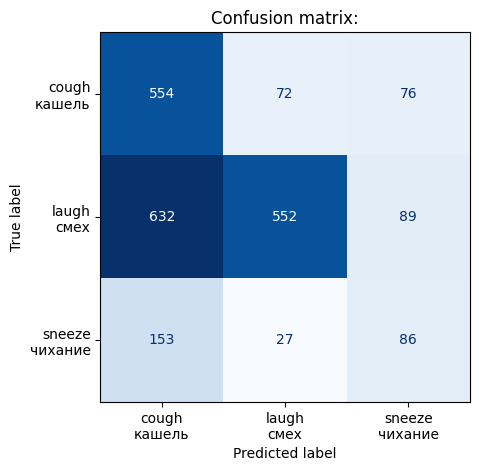

Logistis Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.709    |0.705    |0.712    |
|laugh/смех          |0.785    |0.677    |0.933    |
|sneeze/чихание      |0.477    |0.797    |0.341    |
----------------------------------------------------
Weighted average Precision : 0.793                 |
----------------------------------------------------
Weighted average Recall : 0.700                    |
----------------------------------------------------
Weighted average F1 : 0.724                        |
----------------------------------------------------
Accuracy : 0.700                                   |
----------------------------------------------------

Confusion matrix:
[[495  53 154]
 [155 862 256]
 [ 45   9 212]]


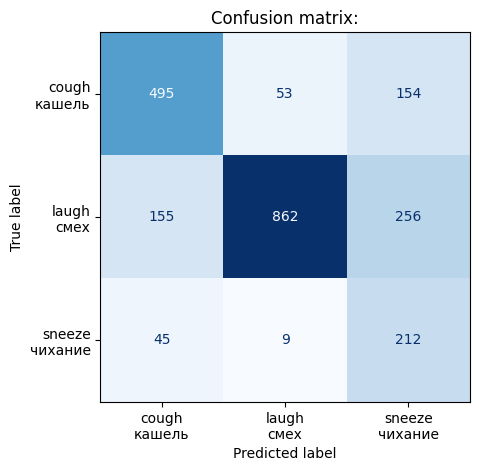

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.461    |0.472    |0.452    |
|laugh/смех          |0.557    |0.450    |0.729    |
|sneeze/чихание      |0.229    |0.425    |0.157    |
----------------------------------------------------
Weighted average Precision : 0.574                 |
----------------------------------------------------
Weighted average Recall : 0.454                    |
----------------------------------------------------
Weighted average F1 : 0.488                        |
----------------------------------------------------
Accuracy : 0.454                                   |
----------------------------------------------------

Confusion matrix:
[[331 156 215]
 [306 573 394]
 [ 96  57 113]]


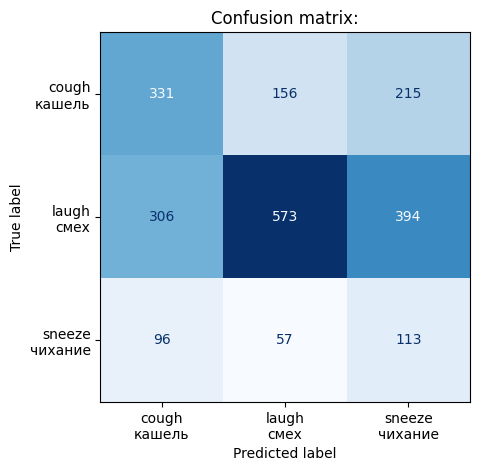

Neural Neutwork for Nonspeech7k:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.748    |0.728    |0.770    |
|laugh/смех          |0.796    |0.687    |0.945    |
|sneeze/чихание      |0.497    |0.857    |0.350    |
----------------------------------------------------
Weighted average Precision : 0.819                 |
----------------------------------------------------
Weighted average Recall : 0.720                    |
----------------------------------------------------
Weighted average F1 : 0.745                        |
----------------------------------------------------
Accuracy : 0.720                                   |
----------------------------------------------------

Confusion matrix:
[[511  41 150]
 [125 875 273]
 [ 28  10 228]]


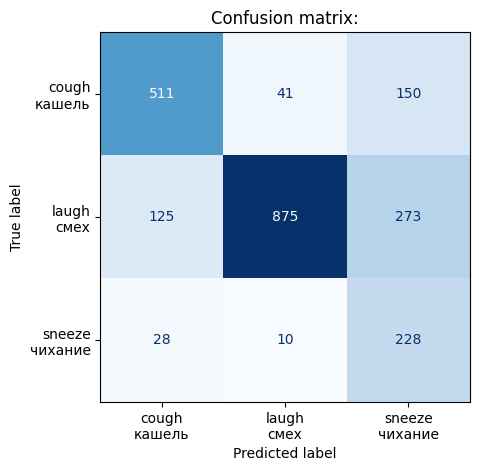

Neural Network for Vocal Sound:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.750    |0.725    |0.777    |
|laugh/смех          |0.804    |0.708    |0.931    |
|sneeze/чихание      |0.516    |0.857    |0.369    |
----------------------------------------------------
Weighted average Precision : 0.816                 |
----------------------------------------------------
Weighted average Recall : 0.731                    |
----------------------------------------------------
Weighted average F1 : 0.753                        |
----------------------------------------------------
Accuracy : 0.731                                   |
----------------------------------------------------

Confusion matrix:
[[509  56 137]
 [119 901 253]
 [ 27  11 228]]


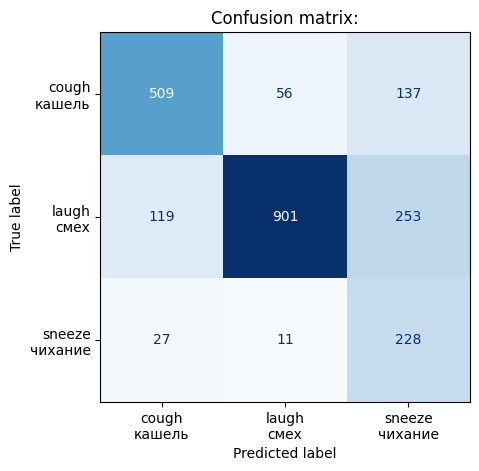

In [33]:
# vocalsound-train, nonspeech-test
cross_corpus(models, names, vocalsound_IS13_dataset_pca, vocalsound_IS13_targets, nonspeech_IS13_dataset_pca, nonspeech_IS13_targets)